# **EDA - 1**

# **About - Dataset:**

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

# **Title: Bike Details Dataset**

**Source:**

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


**Description:**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

# **Title: Bike Details Dataset**

* =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio").
* selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000).
* year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015).
* seller_type: Seller category, either "Individual" or "Dealer" (Categorical).
* owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical).
* km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000).
* ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

# **Questions:**

**Q1. What is the range of selling prices in the dataset?**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate the range of selling prices
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()

print(f"Range of selling prices: ₹{min_price} to ₹{max_price}")

Range of selling prices: ₹5000 to ₹760000


**Q2. What is the median selling price for bikes in the dataset?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate the median selling price
median_price = df["selling_price"].median()

print(f"Median selling price: ₹{median_price}")

Median selling price: ₹45000.0


**Q3. What is the most common seller type?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Find the most common seller type
most_common_seller = df["seller_type"].mode()[0]

print(f"The most common seller type is: {most_common_seller}")

The most common seller type is: Individual


**Q4. How many bikes have driven more than 50,000 kilometers?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Filter bikes that have driven more than 50,000 km
high_km_bikes = df[df["km_driven"] > 50000]

# Count how many bikes match the condition
count = len(high_km_bikes)

print(f"Number of bikes driven more than 50,000 km: {count}")

Number of bikes driven more than 50,000 km: 170


**Q5. What is the average km_driven value for each ownership type?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by ownership type and calculate the average km_driven
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()

# Display the result
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**Q6. What proportion of bikes are from the year 2015 or older?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Filter bikes from 2015 or earlier
older_bikes = df[df["year"] <= 2015]

# Calculate the proportion
proportion = len(older_bikes) / len(df)

# Display as a percentage
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


**Q7. What is the trend of missing values across the dataset?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display as a table
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage.round(2)
})

print(missing_summary)

                   Missing Values  Percentage (%)
name                            0             0.0
selling_price                   0             0.0
year                            0             0.0
seller_type                     0             0.0
owner                           0             0.0
km_driven                       0             0.0
ex_showroom_price             435            41.0


**Q8. What is the highest ex_showroom_price recorded, and for which bike?**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Find the row with the maximum ex_showroom_price
max_price_row = df.loc[df["ex_showroom_price"].idxmax()]

# Extract the price and bike name
highest_price = max_price_row["ex_showroom_price"]
bike_name = max_price_row["name"]

print(f"Highest ex-showroom price: ₹{highest_price}")
print(f"Bike: {bike_name}")

Highest ex-showroom price: ₹1278000.0
Bike: Harley-Davidson Street Bob


**Q9. What is the total number of bikes listed by each seller type?**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Count the number of bikes by seller type
seller_counts = df["seller_type"].value_counts()

# Display the results
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**Q10. What is the relationship between selling_price and km_driven for first-owner bikes?**

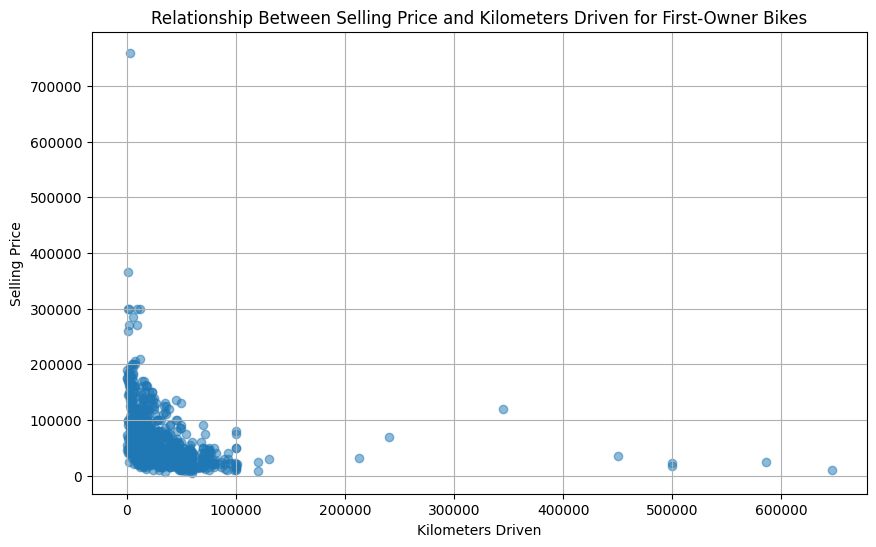

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Filter only first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]

# Plot the relationship between selling price and km driven
plt.figure(figsize=(10, 6))
plt.scatter(first_owner_bikes["km_driven"], first_owner_bikes["selling_price"], alpha=0.5)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship Between Selling Price and Kilometers Driven for First-Owner Bikes")
plt.grid(True)
plt.show()

**Q11. Identify and remove outliers in the km_driven column using the IQR method?**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Compute the IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Display the cleaned dataset
print(filtered_df)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

**Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

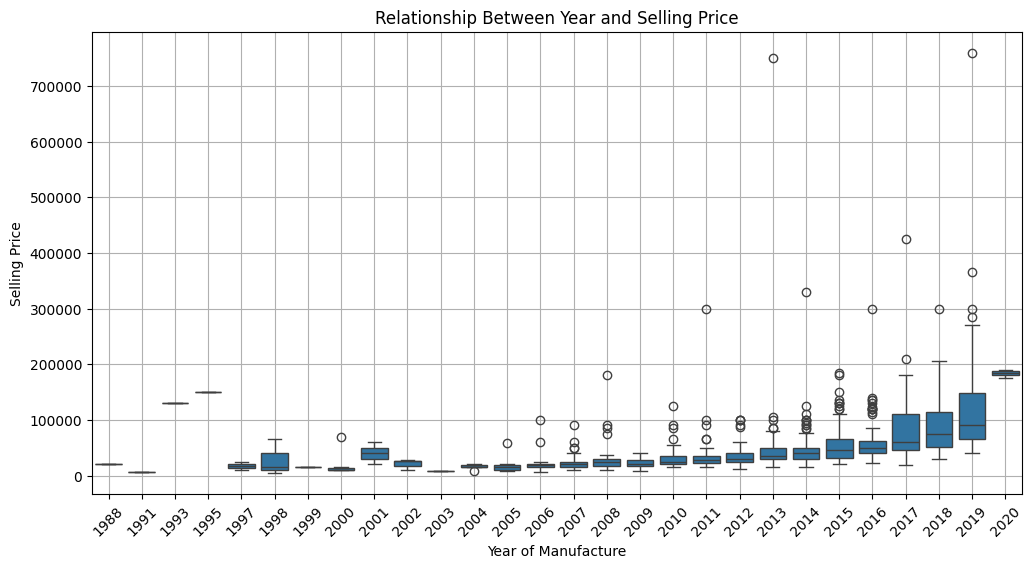

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Set figure size
plt.figure(figsize=(12, 6))

# Create a box plot to analyze price distribution across different years
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Relationship Between Year and Selling Price")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

**Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year).**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Define the current year
current_year = 2025

# Calculate the bike's age
df["bike_age"] = current_year - df["year"]

# Compute the average depreciation per year
df["depreciation_per_year"] = df["selling_price"] / df["bike_age"]

# Calculate the overall average depreciation
average_depreciation = df["depreciation_per_year"].mean()

print(f"Average annual depreciation in selling price: {average_depreciation:.2f}")

Average annual depreciation in selling price: 7001.30


 **Q14. Which bike names are priced significantly above the average price for their manufacturing year?**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Compute average price for each year
yearly_avg_price = df.groupby("year")["selling_price"].mean()

# Merge average price data into the original dataset
df["avg_price_for_year"] = df["year"].map(yearly_avg_price)

# Identify bikes priced significantly above (e.g., 1.5x the average)
df_high_price = df[df["selling_price"] > 1.5 * df["avg_price_for_year"]]

# Display bike names that are significantly above their year's average price
high_priced_bikes = df_high_price[["name", "year", "selling_price", "avg_price_for_year"]]

print(high_priced_bikes)

                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_price_for_year  
2          87660.374046  
7          34289.285714  
13        119689.511628  
18         87660.374046  
23        119689.511628  
..                  ...  
979        56500.000000  

**Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

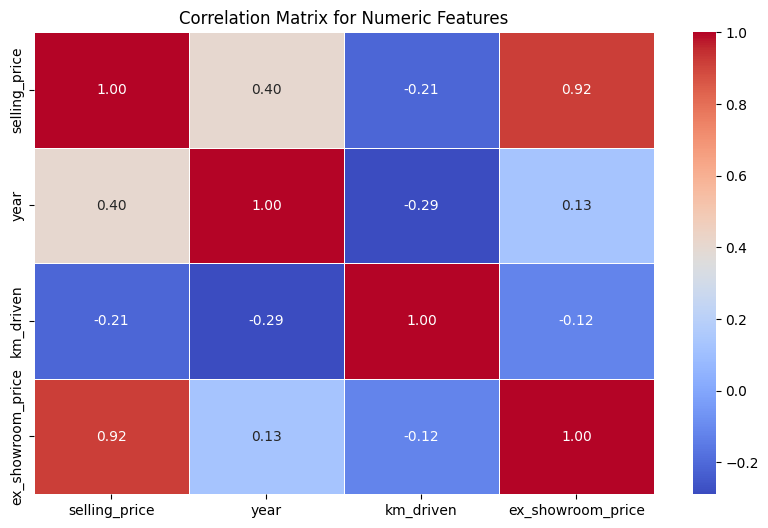

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

# **EDA - 2**

# **About - Dataset:**



The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

# **Title: Car Sale Dataset**

**Source:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

# **Features:**

* **Car_id:** A unique identifier for each car in the dataset, helping to track individual car entries.

* **Date:** The date when the car sale transaction took place, formatted as YYYY-MM-DD

* **Customer Name:** The name of the customer who purchased the car, represented as a string.

* **Gender:** The gender of the customer, categorized as "Male" or "Female.

* **Annual Income:** The customer's annual income in US dollars, represented as a numeric value.

* **Dealer_Name:** The name of the dealership selling the car, represented as a string.

* **Company:** The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.

* **Model:** The specific model name of the car, such as "Corolla," "Civic," etc.

* **Engine:** The engine type of the car, such as "V6," "I4," etc.

* **Transmission:** The type of transmission in the car, either "Manual" or "Automatic.

* **Color:** The color of the car, represented as a string (e.g., "Red," "Blue").

* **Price ($):** The selling price of the car in US dollars.

* **Dealer_No:** A unique identifier for each car dealer in the dataset.

* **Body Style:** The body style of the car, such as "Sedan," "SUV," etc.

* **Phone:** The phone number of the customer who purchased the car.

* **Dealer_Region:** The geographical region of the car dealer, such as "North," "South," etc.

# **Questions:**

**Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale (1).csv


                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

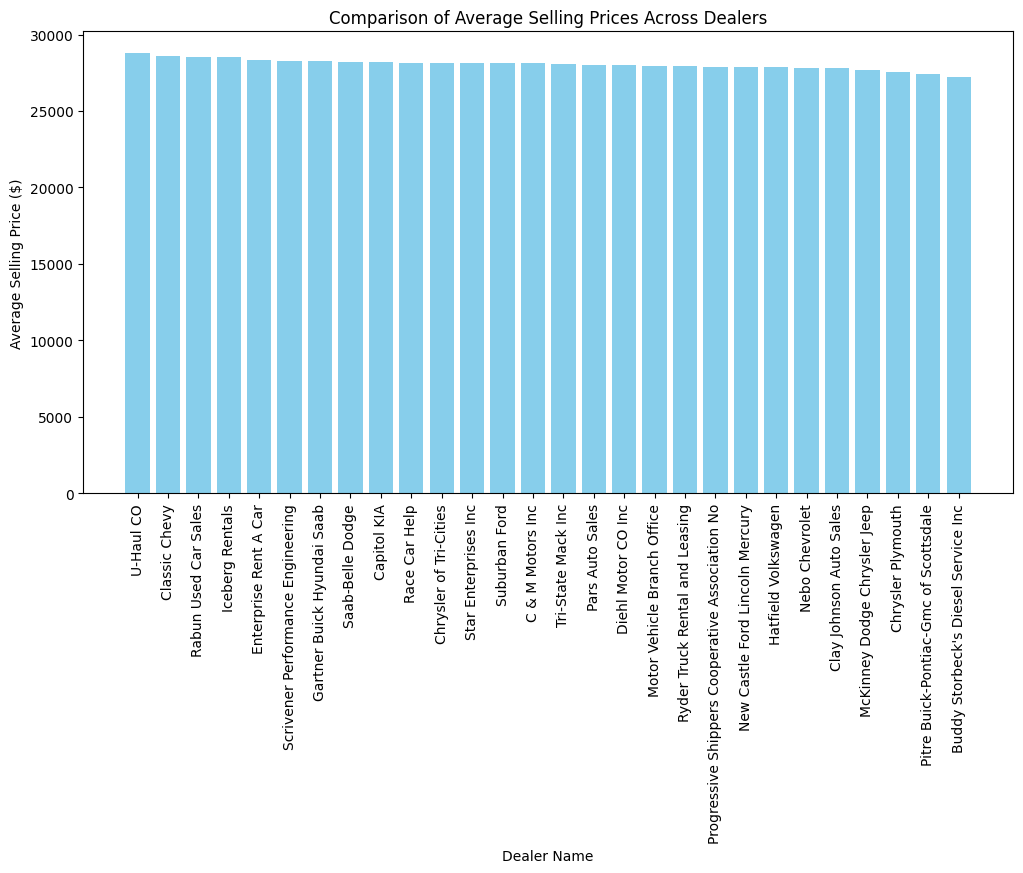

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file path

# Group by Dealer_Name and calculate average selling price
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort values for better visualization
dealer_avg_price = dealer_avg_price.sort_values(by="Price ($)", ascending=False)

# Display results
print(dealer_avg_price)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(dealer_avg_price["Dealer_Name"], dealer_avg_price["Price ($)"], color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price ($)")
plt.title("Comparison of Average Selling Prices Across Dealers")
plt.show()

**Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file path

# Group by Company and calculate standard deviation of prices
company_price_variation = df.groupby('Company')['Price ($)'].std().reset_index()

# Sort values to find highest variation
company_price_variation = company_price_variation.sort_values(by="Price ($)", ascending=False)

# Display results
print(company_price_variation)

       Company     Price ($)
15     Lincoln  19658.050211
24        Saab  19653.740089
4     Cadillac  19517.120220
21    Plymouth  19065.997338
14       Lexus  17852.923492
3        Buick  17142.232626
17     Mercury  16445.172195
19      Nissan  16214.264017
25      Saturn  15990.223671
8         Ford  15849.090227
16  Mercedes-B  15722.807459
20  Oldsmobile  15711.345857
27      Toyota  15367.131714
2          BMW  15065.578723
22     Pontiac  14348.963592
11    Infiniti  13696.332844
5    Chevrolet  13311.063223
29       Volvo  12933.790185
26      Subaru  12920.771620
1         Audi  12904.243867
28  Volkswagen  12527.124011
18  Mitsubishi  11671.343035
6     Chrysler  11583.286811
7        Dodge  11187.592085
9        Honda  11148.629062
12      Jaguar  10222.531533
13        Jeep   9459.834418
0        Acura   8183.046414
23     Porsche   5261.839206
10     Hyundai   3485.982649


**Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

Interquartile Range (IQR) for each transmission type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


<Figure size 800x600 with 0 Axes>

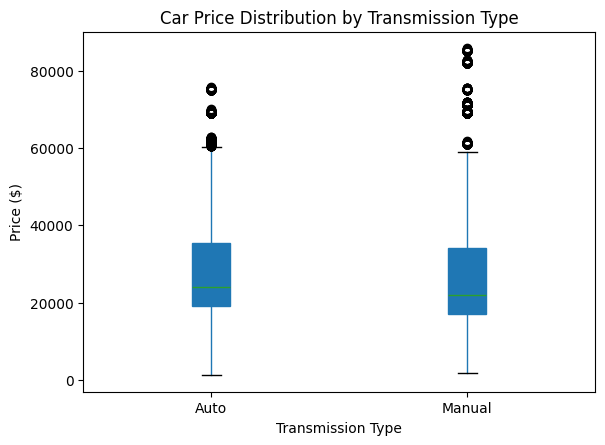

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in price and transmission columns (if needed)
df = df.dropna(subset=['Price ($)', 'Transmission'])

# Calculate IQR for each transmission type
transmission_groups = df.groupby('Transmission')['Price ($)']
iqr_values = transmission_groups.quantile(0.75) - transmission_groups.quantile(0.25)

# Print IQR values
print("Interquartile Range (IQR) for each transmission type:")
print(iqr_values)

# Create a box plot to compare distributions
plt.figure(figsize=(8, 6))
df.boxplot(column='Price ($)', by='Transmission', grid=False, patch_artist=True)

plt.title("Car Price Distribution by Transmission Type")
plt.suptitle("")  # Remove default title
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.show()

**Q4. What is the distribution of car prices across different regions?**

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

<Figure size 1000x600 with 0 Axes>

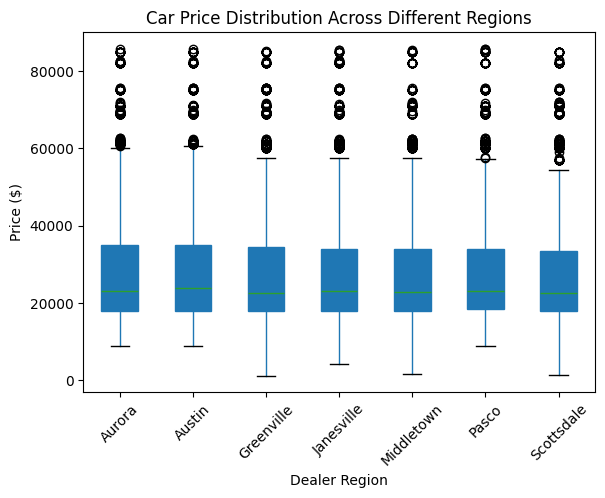

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in price and region columns (if needed)
df = df.dropna(subset=['Price ($)', 'Dealer_Region'])

# Summary statistics: Price distribution across regions
region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print(region_stats)

# Create a box plot for visualizing price distribution by region
plt.figure(figsize=(10, 6))
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False, patch_artist=True)

plt.title("Car Price Distribution Across Different Regions")
plt.suptitle("")  # Remove default title
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

**Q5. What is the distribution of cars based on body styles?**

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


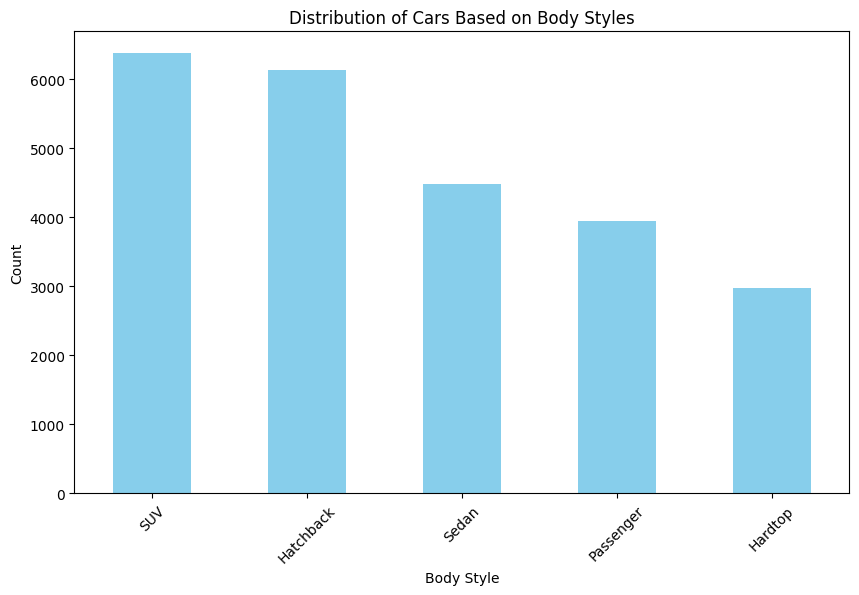

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Count occurrences of each body style
body_style_counts = df['Body Style'].value_counts()

# Display results
print(body_style_counts)

# Plot distribution
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Distribution of Cars Based on Body Styles")
plt.xticks(rotation=45)
plt.show()

**Q6. How does the average selling price of cars vary by customer gender and annual income?**

Average Selling Price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

Average Selling Price by Income Group:
Income Group
0-25K        27884.29782
25K-50K              NaN
50K-75K              NaN
75K-100K     43000.00000
100K-150K    23200.20000
150K+        22650.40000
Name: Price ($), dtype: float64


<ipython-input-29-24a83e50ff32>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_avg_price = df.groupby('Income Group')['Price ($)'].mean()


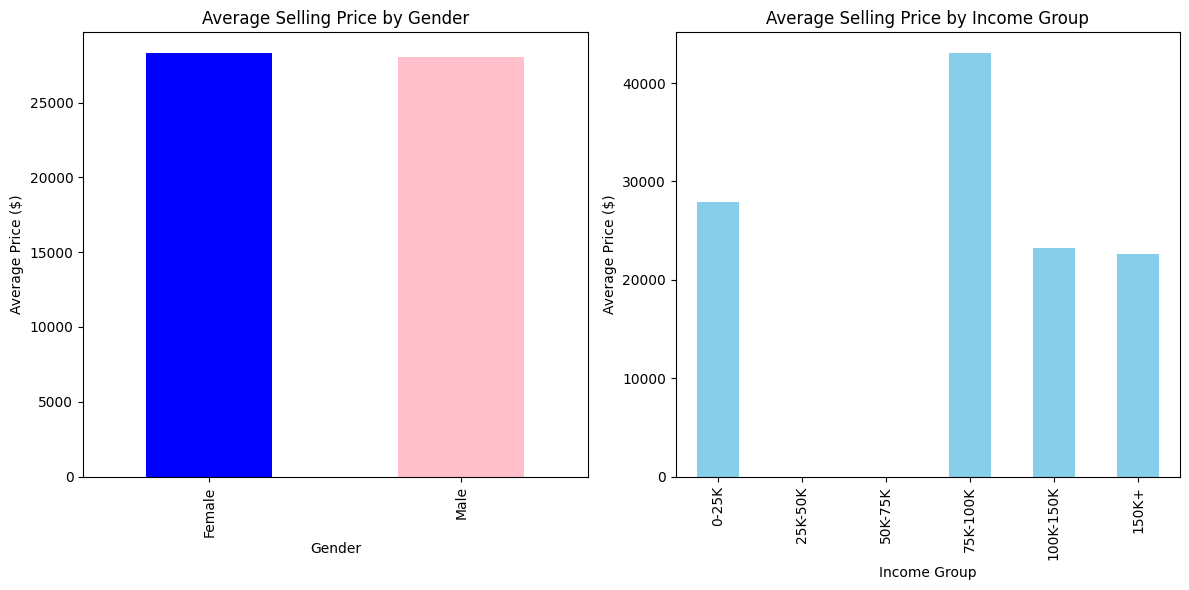

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Gender', 'Annual Income'])

# Group by Gender and calculate average selling price
gender_avg_price = df.groupby('Gender')['Price ($)'].mean()
print("Average Selling Price by Gender:")
print(gender_avg_price)

# Group by Annual Income range (binning income into categories)
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
income_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K+']
df['Income Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

income_avg_price = df.groupby('Income Group')['Price ($)'].mean()
print("\nAverage Selling Price by Income Group:")
print(income_avg_price)

# Plot comparison
plt.figure(figsize=(12, 6))

# Gender-based price variation
plt.subplot(1, 2, 1)
gender_avg_price.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Average Price ($)")
plt.title("Average Selling Price by Gender")

# Income-based price variation
plt.subplot(1, 2, 2)
income_avg_price.plot(kind='bar', color='skyblue')
plt.xlabel("Income Group")
plt.ylabel("Average Price ($)")
plt.title("Average Selling Price by Income Group")

plt.tight_layout()
plt.show()

**Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

<Figure size 1200x600 with 0 Axes>

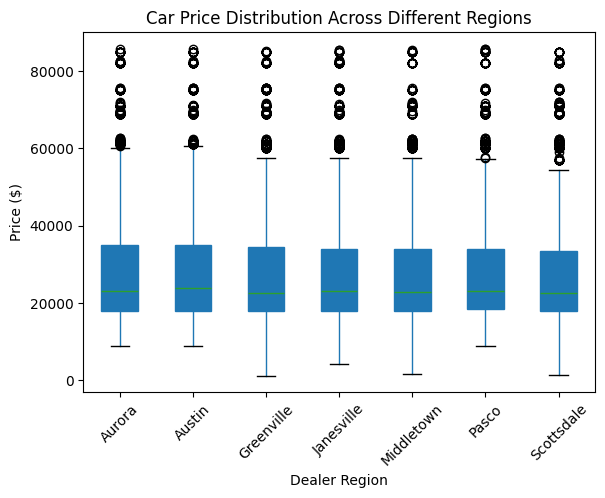

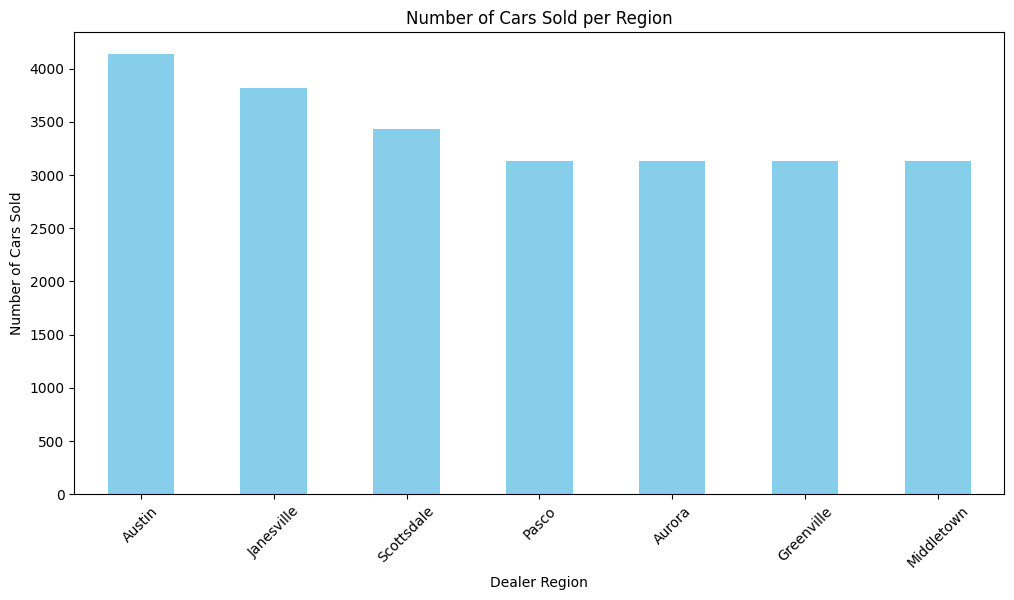

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in price and region columns (if needed)
df = df.dropna(subset=['Price ($)', 'Dealer_Region'])

# Summary statistics: Price distribution across regions
region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print(region_stats)

# Count number of cars sold per region
region_sales = df['Dealer_Region'].value_counts()
print("\nNumber of Cars Sold per Region:")
print(region_sales)

# Create a box plot for price distribution by region
plt.figure(figsize=(12, 6))
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False, patch_artist=True)
plt.title("Car Price Distribution Across Different Regions")
plt.suptitle("")  # Remove default title
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)

# Create a bar chart for number of cars sold per region
plt.figure(figsize=(12, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.xlabel("Dealer Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold per Region")
plt.xticks(rotation=45)

plt.show()

**Q8. How does the average car price differ between cars with different engine sizes?**

                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


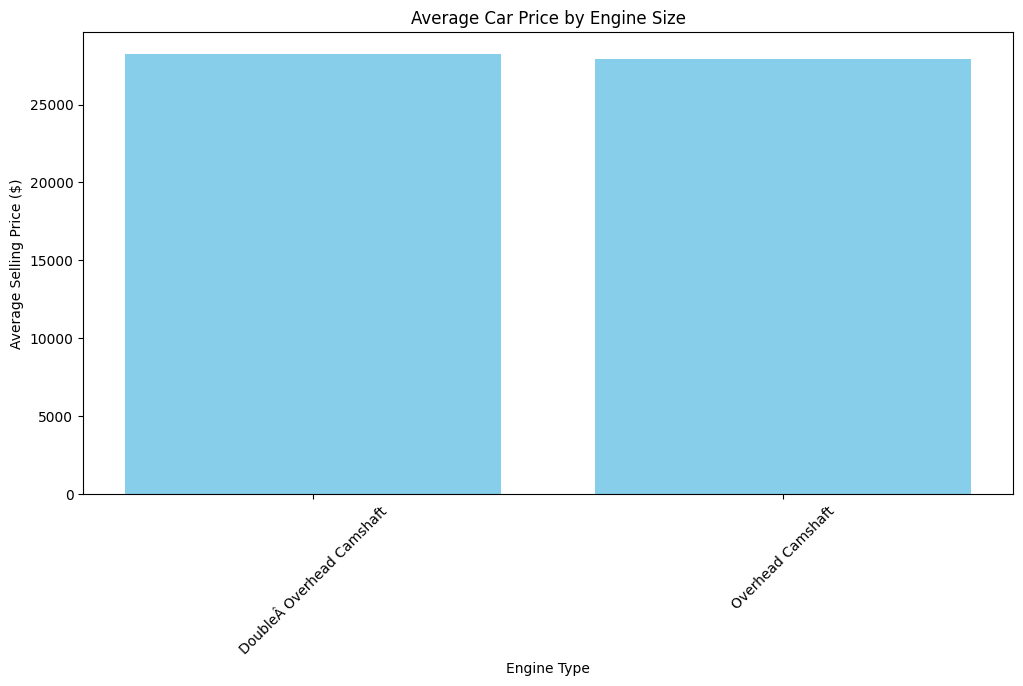

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Engine'])

# Group by Engine type and calculate average selling price
engine_avg_price = df.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort values for better visualization
engine_avg_price = engine_avg_price.sort_values(by="Price ($)", ascending=False)

# Display results
print(engine_avg_price)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(engine_avg_price["Engine"], engine_avg_price["Price ($)"], color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Engine Type")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Engine Size")
plt.show()

**Q9. How do car prices vary based on the customer’s annual income bracket?**

  Income Group    Price ($)
0        0-25K  27884.29782
1      25K-50K          NaN
2      50K-75K          NaN
3     75K-100K  43000.00000
4    100K-150K  23200.20000
5        150K+  22650.40000


<ipython-input-32-306358b5fda0>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_avg_price = df.groupby('Income Group')['Price ($)'].mean().reset_index()


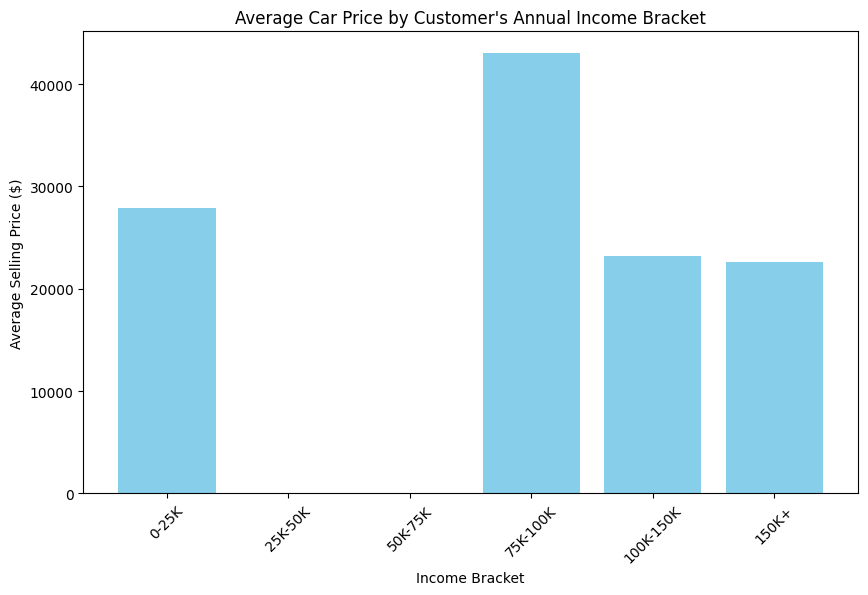

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Define income brackets
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
income_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K+']
df['Income Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Group by Income Group and calculate average selling price
income_avg_price = df.groupby('Income Group')['Price ($)'].mean().reset_index()

# Display results
print(income_avg_price)

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(income_avg_price["Income Group"], income_avg_price["Price ($)"], color="skyblue")
plt.xlabel("Income Bracket")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Customer's Annual Income Bracket")
plt.xticks(rotation=45)
plt.show()

**Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

Top 5 Car Models with Highest Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

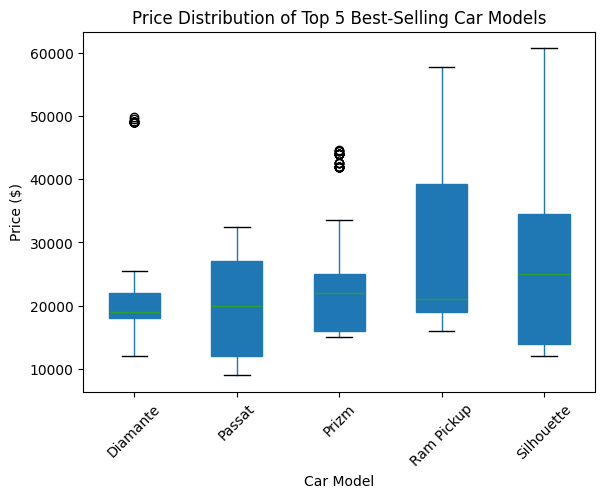

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Model'])

# Count number of sales per car model
model_sales = df['Model'].value_counts().head(5)

# Display top 5 models
print("Top 5 Car Models with Highest Sales:")
print(model_sales)

# Filter dataset for only top 5 models
top_models = model_sales.index
df_top_models = df[df['Model'].isin(top_models)]

# Create a box plot for price distribution of top-selling models
plt.figure(figsize=(10, 6))
df_top_models.boxplot(column='Price ($)', by='Model', grid=False, patch_artist=True)

plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.suptitle("")  # Remove default title
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

**Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

Average Car Price by Engine Size and Color:
                      Engine       Color     Price ($)
0  DoubleÂ Overhead Camshaft       Black  25766.451103
1  DoubleÂ Overhead Camshaft  Pale White  30347.987460
2  DoubleÂ Overhead Camshaft         Red  27434.392314
3          Overhead Camshaft       Black  31732.967164
4          Overhead Camshaft  Pale White  24327.767694
5          Overhead Camshaft         Red  30153.405229

Price Variation by Color:
        Color     Price ($)
0       Black  15286.065976
1  Pale White  14077.346859
2         Red  15519.360962


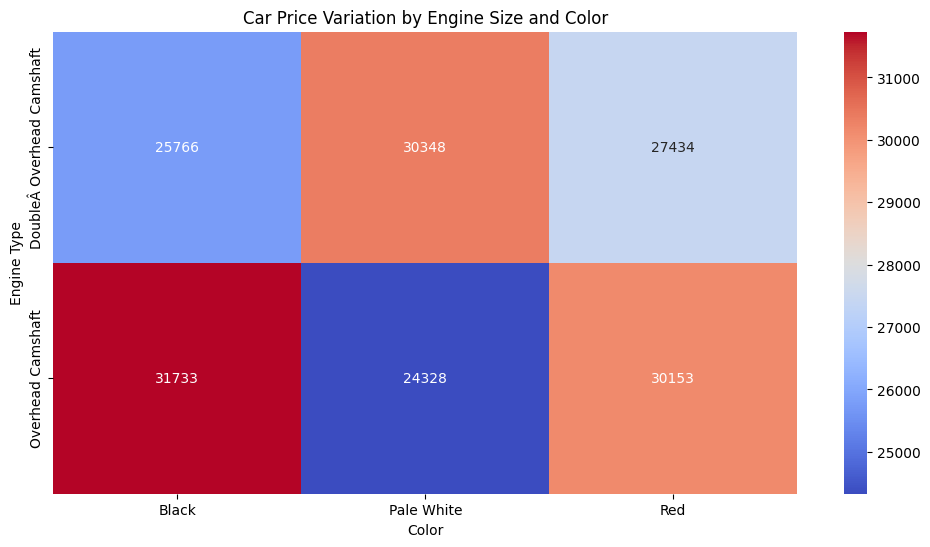

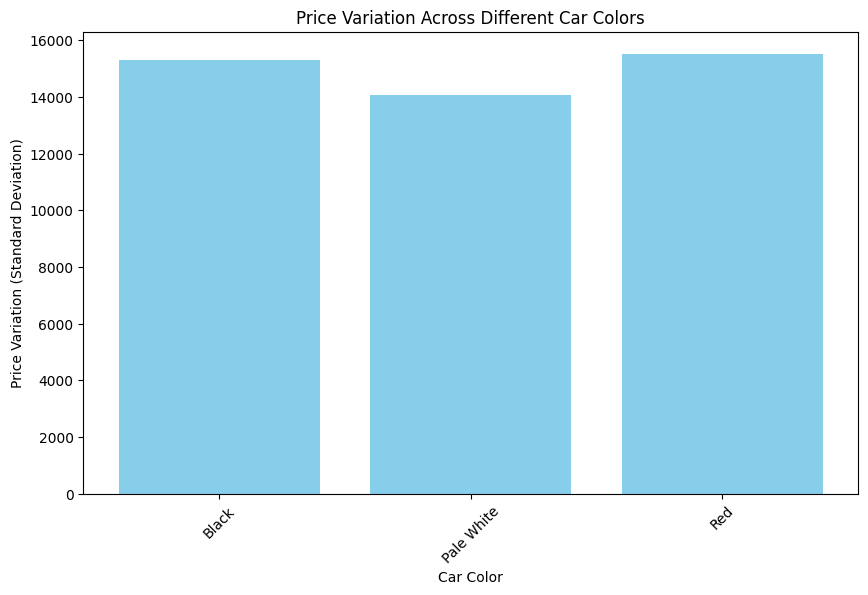

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Engine', 'Color'])

# Group by Engine type and Color, then calculate average price
engine_color_avg_price = df.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()

# Calculate price variation (standard deviation) for each color
color_price_variation = df.groupby('Color')['Price ($)'].std().reset_index()

# Display results
print("Average Car Price by Engine Size and Color:")
print(engine_color_avg_price)

print("\nPrice Variation by Color:")
print(color_price_variation)

# Plot heatmap for engine size vs. color price variation
plt.figure(figsize=(12, 6))
pivot_table = engine_color_avg_price.pivot(index='Engine', columns='Color', values='Price ($)')
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Car Price Variation by Engine Size and Color")
plt.xlabel("Color")
plt.ylabel("Engine Type")
plt.show()

# Bar plot for price variation by color
plt.figure(figsize=(10, 6))
plt.bar(color_price_variation["Color"], color_price_variation["Price ($)"], color="skyblue")
plt.xlabel("Car Color")
plt.ylabel("Price Variation (Standard Deviation)")
plt.title("Price Variation Across Different Car Colors")
plt.xticks(rotation=45)
plt.show()

**Q12. Is there any seasonal trend in car sales based on the date of sale?**

Average Car Price by Month:
Month
1     27463.567089
2     28087.000000
3     27169.949837
4     28316.878550
5     28085.088654
6     28283.324781
7     27929.293913
8     28617.969501
9     28331.370045
10    28434.571038
11    27948.034006
12    27993.812465
Name: Price ($), dtype: float64


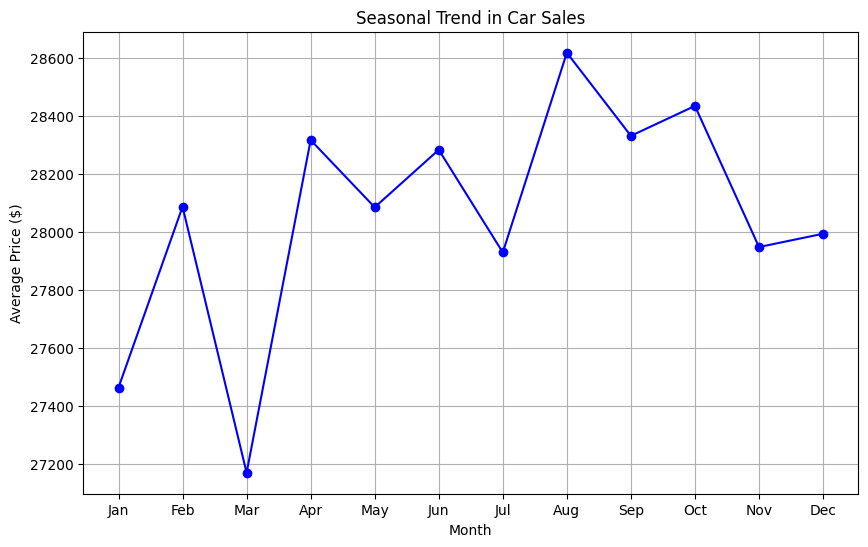

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by Month to analyze seasonal trends
monthly_sales = df.groupby('Month')['Price ($)'].mean()

# Display results
print("Average Car Price by Month:")
print(monthly_sales)

# Plot seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

**Q13. How does the car price distribution change when considering different combinations of body style and transmission type?**

Average Car Price by Body Style and Transmission Type:
  Body Style Transmission     Price ($)
0    Hardtop         Auto  31520.188210
1    Hardtop       Manual  27016.943698
2  Hatchback         Auto  25910.544824
3  Hatchback       Manual  28702.550562
4  Passenger         Auto  28915.835149
5  Passenger       Manual  28969.521039
6        SUV         Auto  27501.404407
7        SUV       Manual  26079.019161
8      Sedan         Auto  29955.294344
9      Sedan       Manual  29664.271572


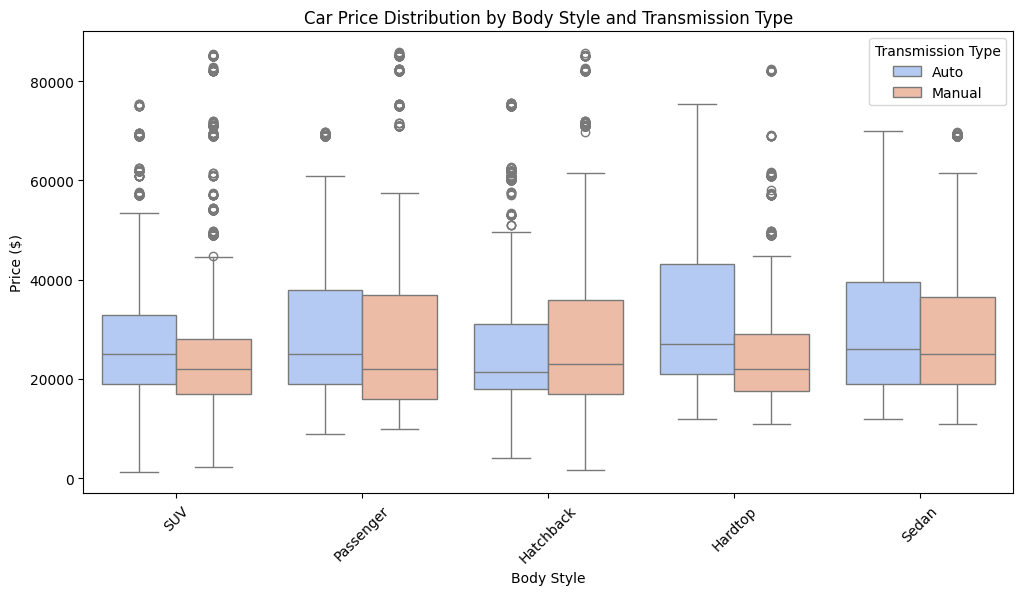

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Body Style', 'Transmission'])

# Group by Body Style and Transmission Type, then calculate average price
body_trans_avg_price = df.groupby(['Body Style', 'Transmission'])['Price ($)'].mean().reset_index()

# Display results
print("Average Car Price by Body Style and Transmission Type:")
print(body_trans_avg_price)

# Create a box plot for price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette="coolwarm")

plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend(title="Transmission Type")
plt.show()

**Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

Correlation Matrix:
               Price ($)  Engine Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


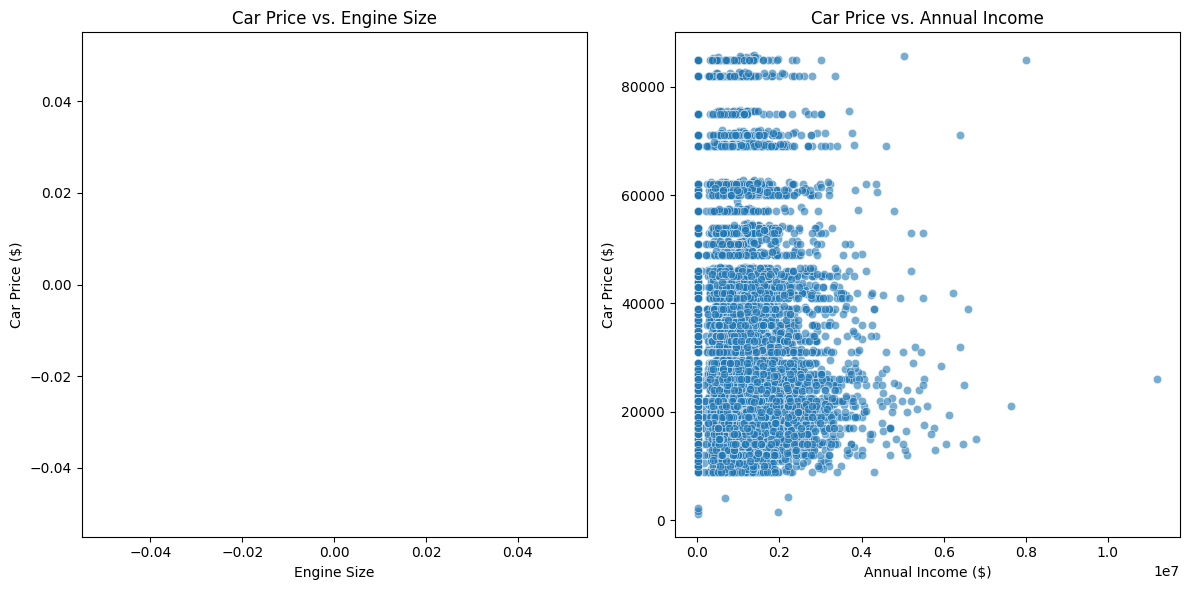

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Engine', 'Annual Income'])

# Convert 'Annual Income' to numeric
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# Extract numeric engine sizes (assuming V6, I4, etc.)
df['Engine Size'] = df['Engine'].str.extract(r'(\d+)')  # Extract numbers from text
df['Engine Size'] = pd.to_numeric(df['Engine Size'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = df[['Price ($)', 'Engine Size', 'Annual Income']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Create scatter plots to visualize interactions
plt.figure(figsize=(12, 6))

# Car Price vs. Engine Size
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Engine Size'], y=df['Price ($)'], alpha=0.6)
plt.xlabel("Engine Size")
plt.ylabel("Car Price ($)")
plt.title("Car Price vs. Engine Size")

# Car Price vs. Annual Income
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Annual Income'], y=df['Price ($)'], alpha=0.6)
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Price ($)")
plt.title("Car Price vs. Annual Income")

plt.tight_layout()
plt.show()

**Q15. How does the average car price vary across different car models and engine types?**

Average Car Price by Model and Engine Type:
        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


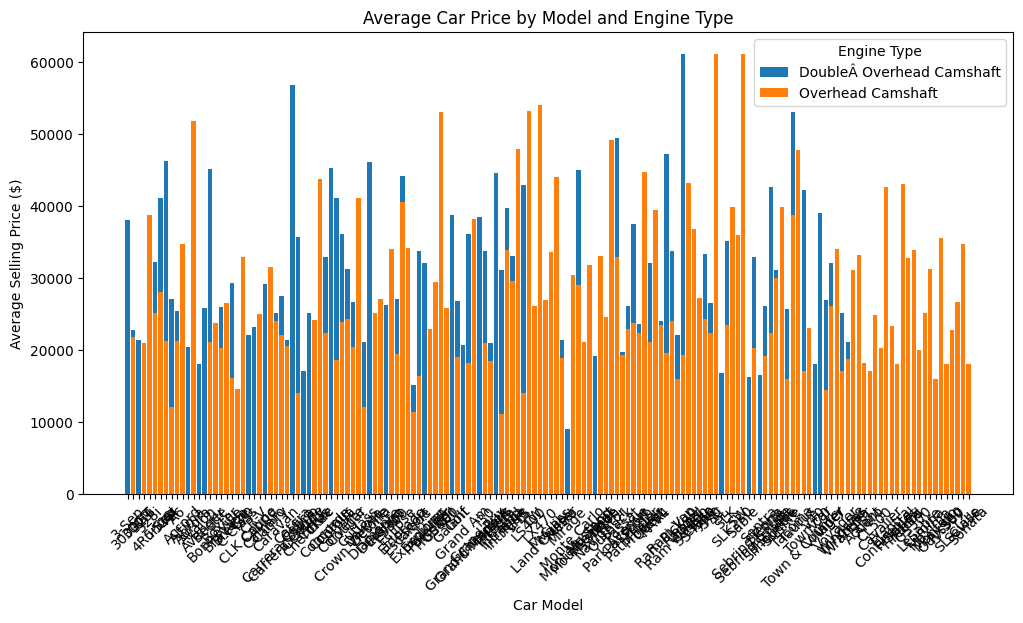

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Model', 'Engine'])

# Group by Model and Engine type, then calculate average price
model_engine_avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Display results
print("Average Car Price by Model and Engine Type:")
print(model_engine_avg_price)

# Plot comparison
plt.figure(figsize=(12, 6))
for engine_type in model_engine_avg_price['Engine'].unique():
    subset = model_engine_avg_price[model_engine_avg_price['Engine'] == engine_type]
    plt.bar(subset["Model"], subset["Price ($)"], label=engine_type)

plt.xlabel("Car Model")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Model and Engine Type")
plt.xticks(rotation=45)
plt.legend(title="Engine Type")
plt.show()

<ipython-input-52-e9aa65924062>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Artist"], y=df["Popularity"], palette="coolwarm")


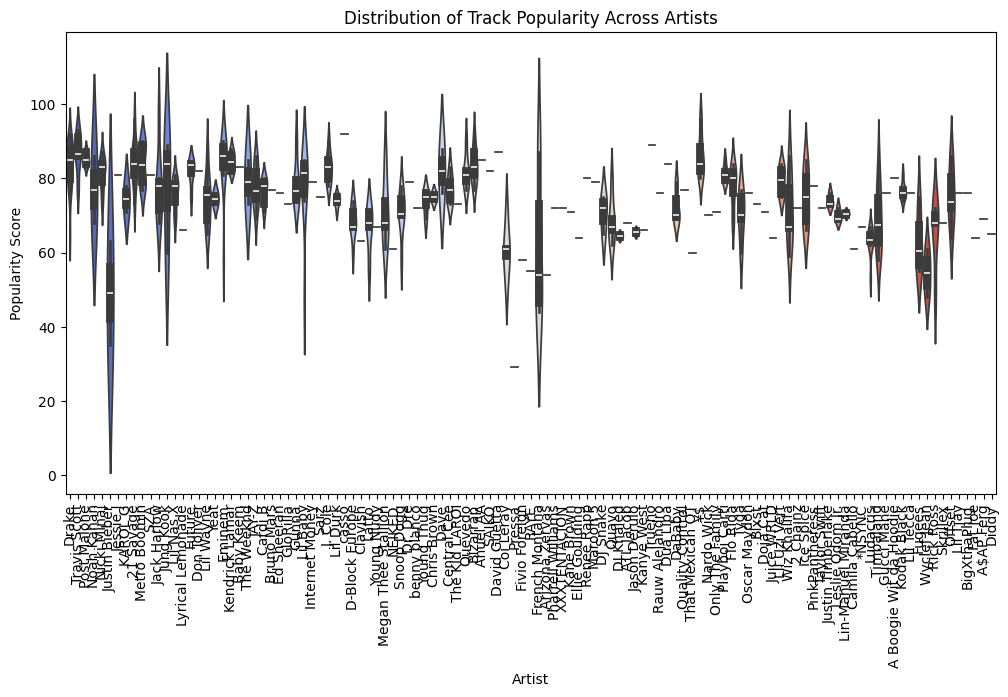

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Set figure size
plt.figure(figsize=(12, 6))

# Create violin plot
sns.violinplot(x=df["Artist"], y=df["Popularity"], palette="coolwarm")

# Alternative: Swarm plot
# sns.swarmplot(x=df["Artist"], y=df["Popularity"], color="black", alpha=0.6)

# Rotate labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Distribution of Track Popularity Across Artists")

# Show plot
plt.show()

# **EDA-3 Amazon Sales Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.xlsx to amazon.xlsx


###**1. What is the average rating for each product category?**

Average Rating for Each Product Category:
                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


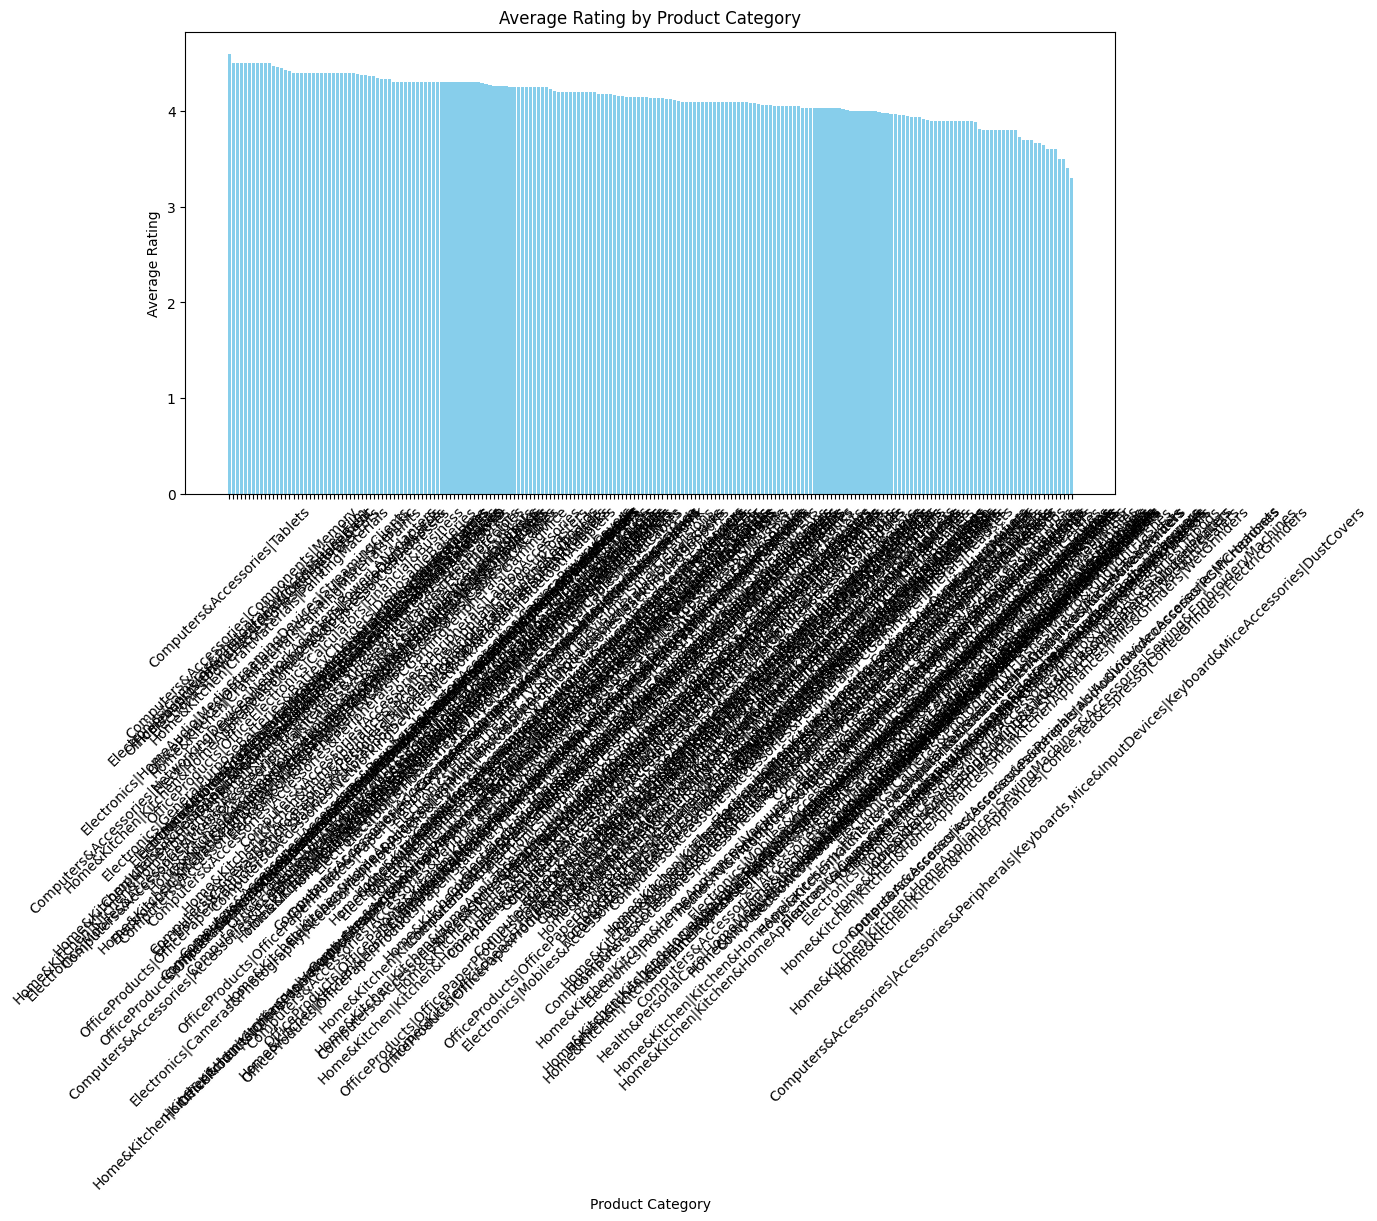

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("amazon.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['category', 'rating'])

# Convert ratings to numeric format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate average rating
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Sort values for better visualization
category_avg_rating = category_avg_rating.sort_values(by="rating", ascending=False)

# Display results
print("Average Rating for Each Product Category:")
print(category_avg_rating)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(category_avg_rating["category"], category_avg_rating["rating"], color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Average Rating by Product Category")
plt.xticks(rotation=45)
plt.show()

###**2. What are the top rating_count products by category?**

Top-Rated Products by Category:
                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5-inch LC

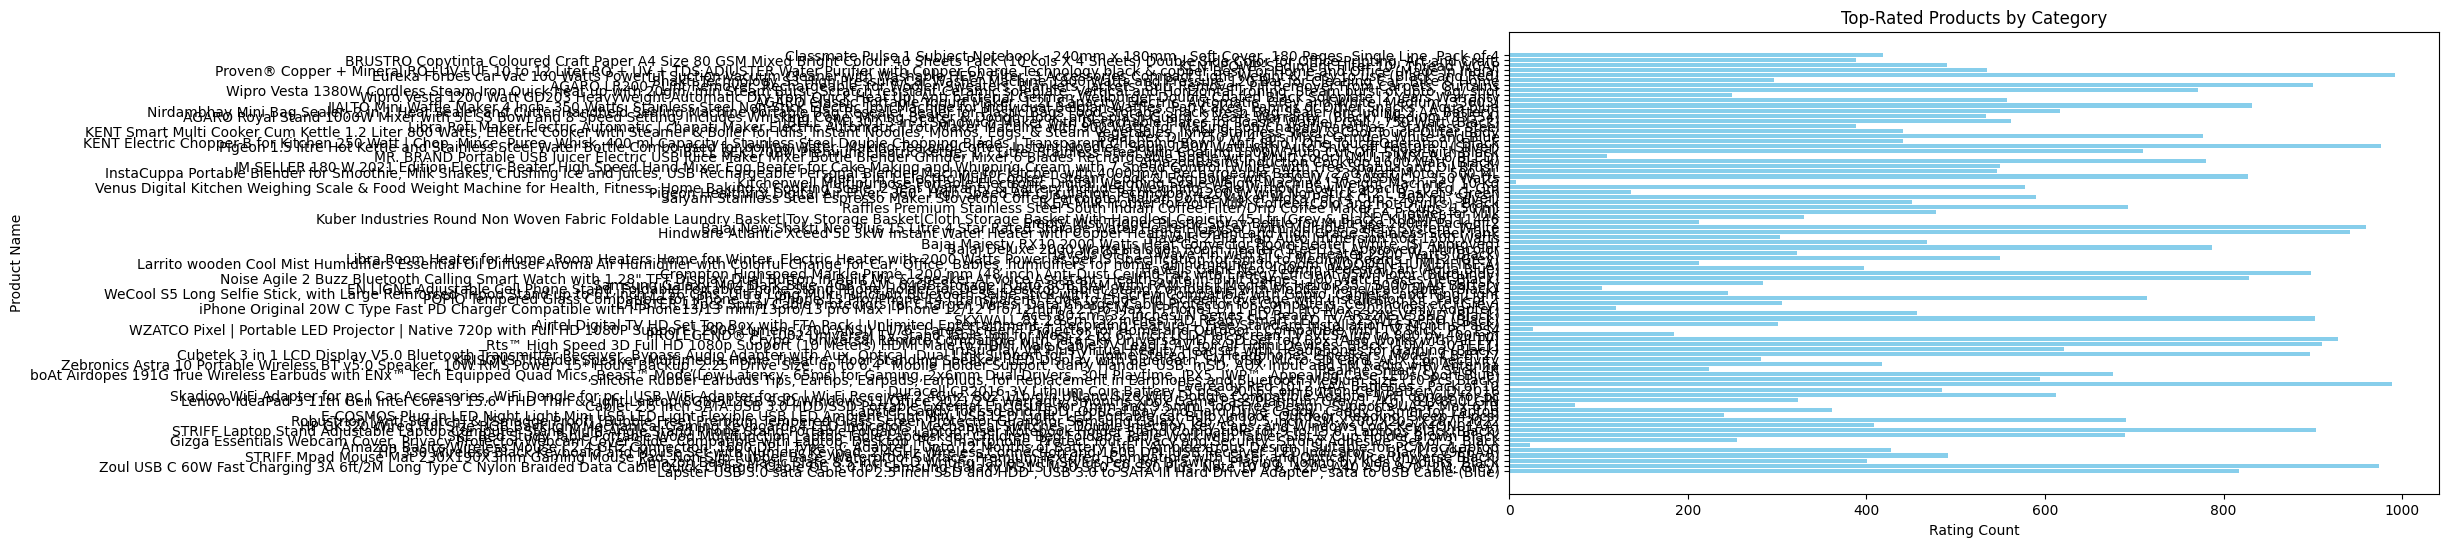

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("amazon.csv")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['category', 'product_name', 'rating_count'])

# Convert rating_count to numeric format
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Ensure no NaN values in category before grouping
df = df[df['category'].notna()]

# Handle potential NaN issues in idxmax()
top_products = df.loc[df.groupby('category', dropna=False)['rating_count'].idxmax().dropna()][['category', 'product_name', 'rating_count']]

# Display results
print("Top-Rated Products by Category:")
print(top_products)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.barh(top_products["product_name"], top_products["rating_count"], color="skyblue")
plt.xlabel("Rating Count")
plt.ylabel("Product Name")
plt.title("Top-Rated Products by Category")
plt.show()

###**3. What is the distribution of discounted prices vs. actual prices?**

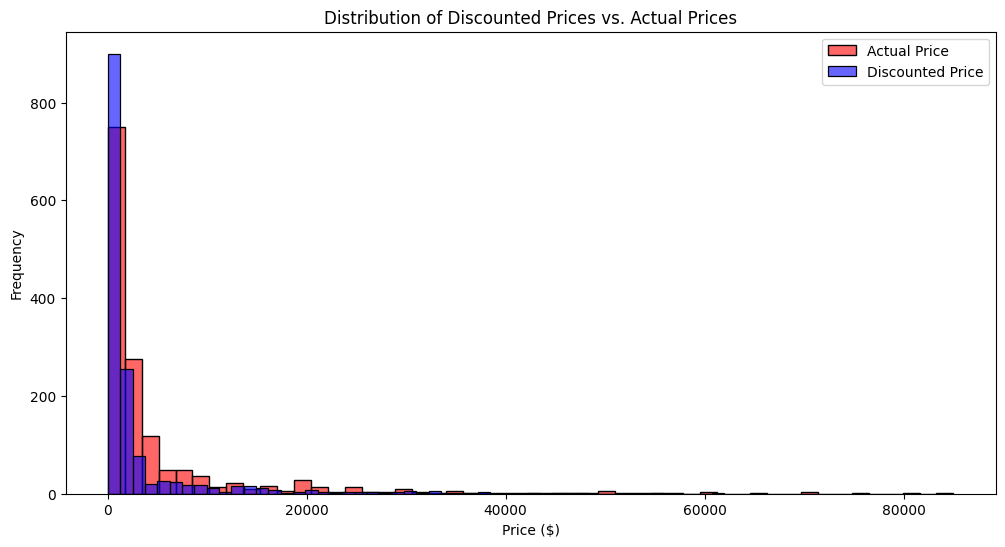

<ipython-input-34-b8326db49a4c>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['actual_price'], color='red', label='Actual Price', shade=True)
<ipython-input-34-b8326db49a4c>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['discounted_price'], color='blue', label='Discounted Price', shade=True)


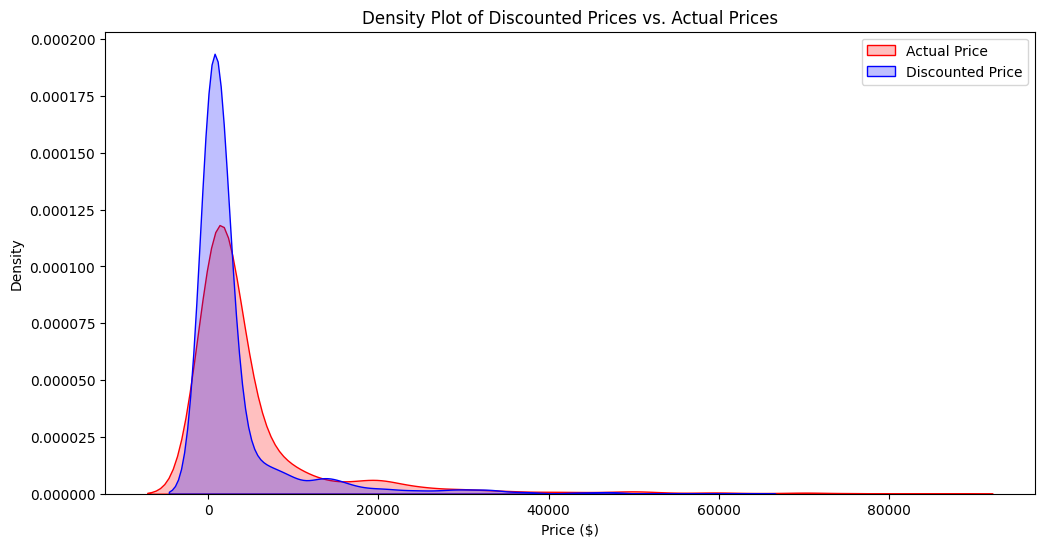

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Convert price columns to numeric format
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Remove zero or negative values to avoid skewed distributions
df = df[(df['discounted_price'] > 0) & (df['actual_price'] > 0)]

# Plot histograms for price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_price'], bins=50, color='red', label='Actual Price', alpha=0.6)
sns.histplot(df['discounted_price'], bins=50, color='blue', label='Discounted Price', alpha=0.6)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.legend()
plt.show()

# Plot density comparison
plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], color='red', label='Actual Price', shade=True)
sns.kdeplot(df['discounted_price'], color='blue', label='Discounted Price', shade=True)
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.title("Density Plot of Discounted Prices vs. Actual Prices")
plt.legend()
plt.show()

###**4. How does the average discount percentage vary across categories?**

Average Discount Percentage by Category:
                                              category  discount_percentage
6    Computers&Accessories|Accessories&Peripherals|...            90.090090
75   Electronics|Headphones,Earbuds&Accessories|Ear...            90.090090
106  Electronics|Mobiles&Accessories|MobileAccessor...            90.090090
73   Electronics|Headphones,Earbuds&Accessories|Ada...            87.987988
14   Computers&Accessories|Accessories&Peripherals|...            87.722505
..                                                 ...                  ...
197  OfficeProducts|OfficeElectronics|Calculators|F...             0.000000
199  OfficeProducts|OfficePaperProducts|Paper|Copy&...             0.000000
205  OfficeProducts|OfficePaperProducts|Paper|Stati...             0.000000
206  OfficeProducts|OfficePaperProducts|Paper|Stati...             0.000000
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...             0.000000

[211 rows x 2 columns]


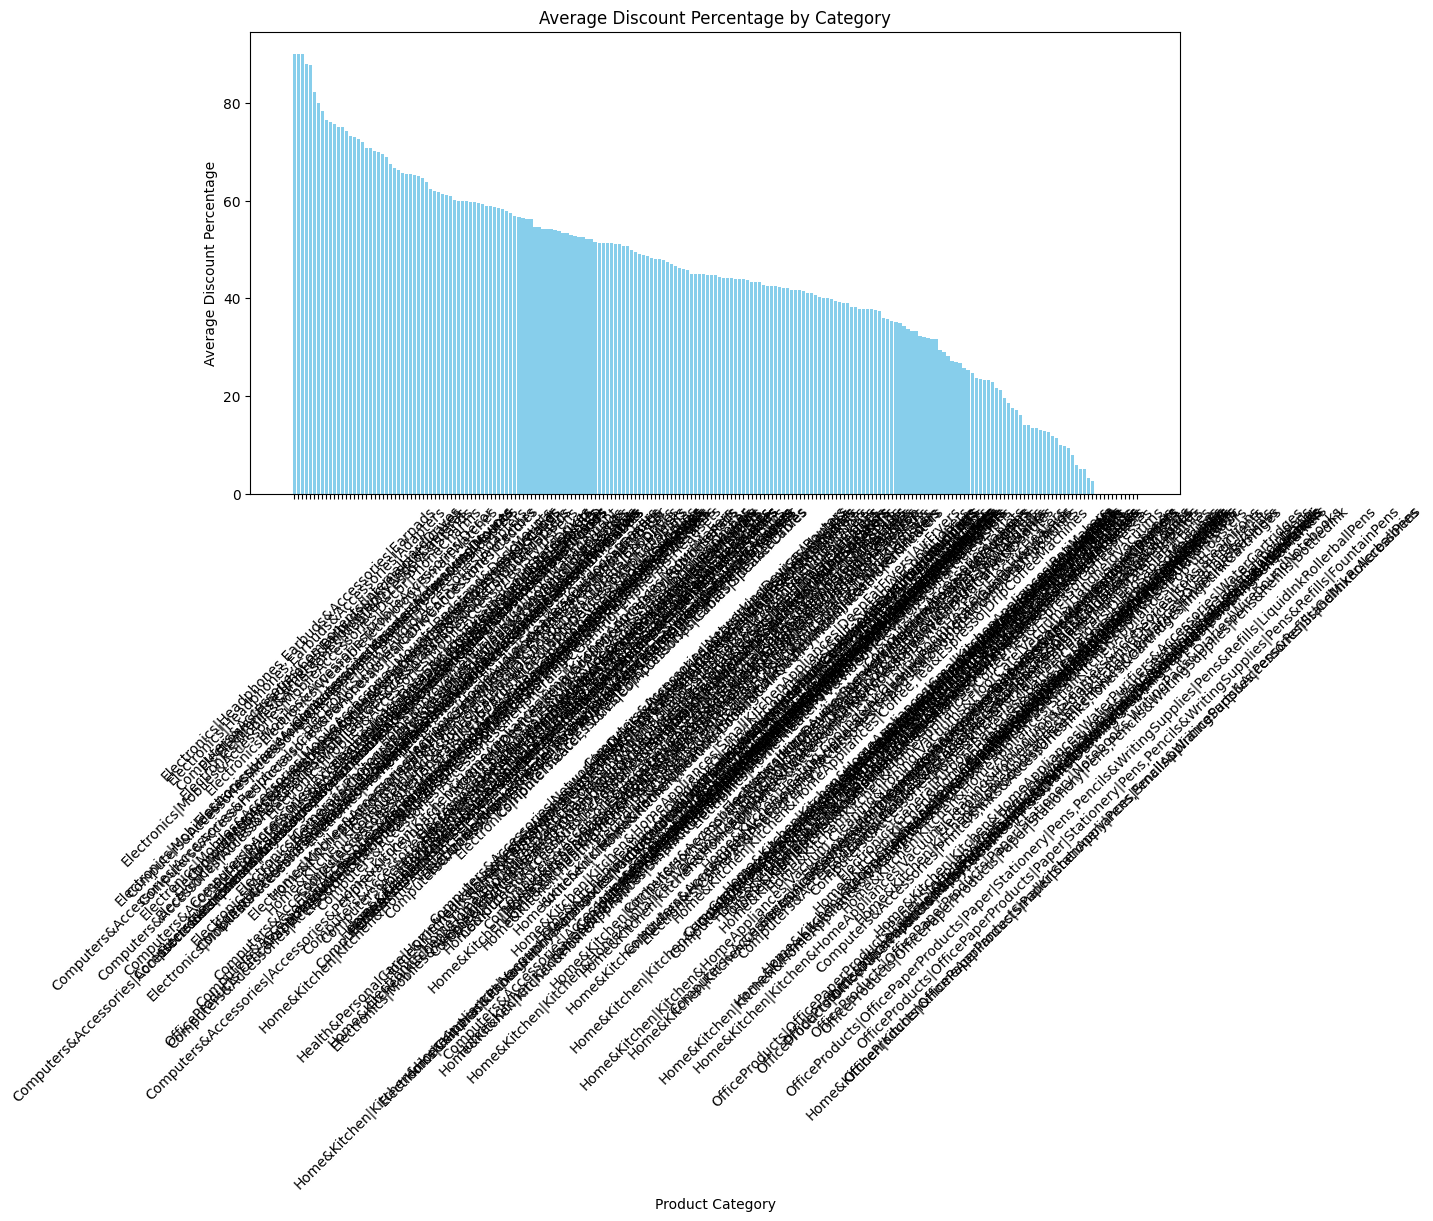

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['actual_price', 'discounted_price', 'category'])

# Convert price columns to numeric format
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Calculate discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Group by category and calculate average discount percentage
category_avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()

# Sort values for better visualization
category_avg_discount = category_avg_discount.sort_values(by="discount_percentage", ascending=False)

# Display results
print("Average Discount Percentage by Category:")
print(category_avg_discount)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(category_avg_discount["category"], category_avg_discount["discount_percentage"], color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage by Category")
plt.xticks(rotation=45)
plt.show()

###**5. What are the most popular product names?**

Most Popular Products:
                                          product_name  rating_count
977  Sennheiser CX 80S in-Ear Wired Headphones with...       98250.0
536  boAt Rockerz 400 Bluetooth On Ear Headphones W...       97175.0
918  boAt Rockerz 400 Bluetooth On Ear Headphones W...       97174.0
691  TP-Link USB Bluetooth Adapter for PC, 5.0 Blue...       95116.0
392  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94364.0
628  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94364.0
443  boAt Rugged v3 Extra Tough Unbreakable Braided...       94364.0
92   boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94363.0
258  boAt Rugged V3 Braided Micro USB Cable (Pearl ...       94363.0
3    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94363.0


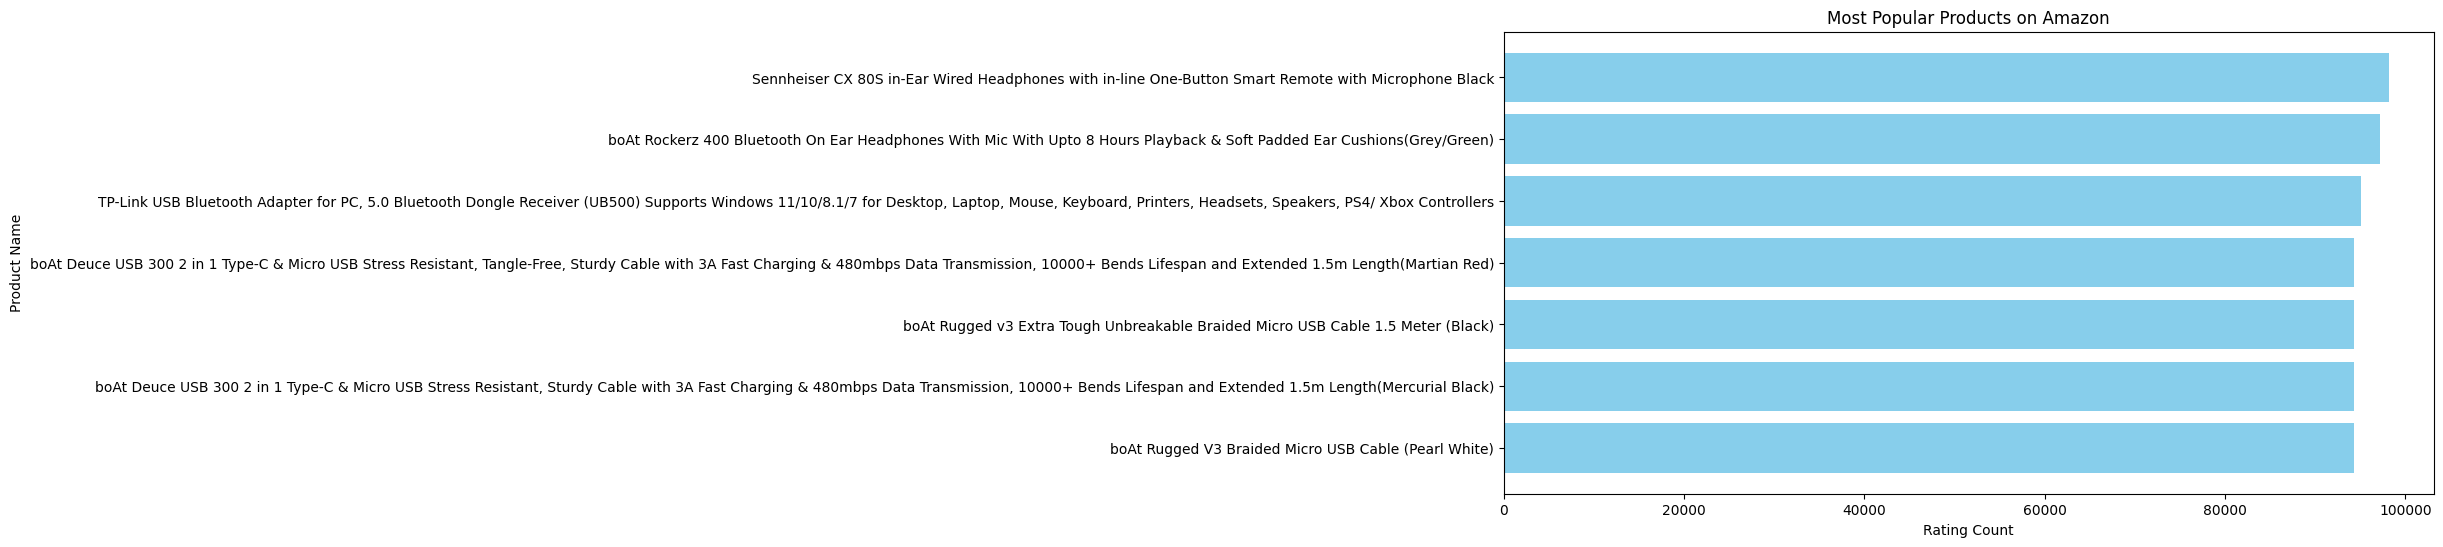

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['product_name', 'rating_count'])

# Convert rating_count to numeric format
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Sort products by rating count (descending order)
top_products = df[['product_name', 'rating_count']].sort_values(by="rating_count", ascending=False).head(10)

# Display results
print("Most Popular Products:")
print(top_products)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.barh(top_products["product_name"], top_products["rating_count"], color="skyblue")
plt.xlabel("Rating Count")
plt.ylabel("Product Name")
plt.title("Most Popular Products on Amazon")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

###**6. What are the most popular product keywords?**

Most Popular Products:
                                          product_name  rating_count
977  Sennheiser CX 80S in-Ear Wired Headphones with...       98250.0
536  boAt Rockerz 400 Bluetooth On Ear Headphones W...       97175.0
918  boAt Rockerz 400 Bluetooth On Ear Headphones W...       97174.0
691  TP-Link USB Bluetooth Adapter for PC, 5.0 Blue...       95116.0
392  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94364.0
628  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94364.0
443  boAt Rugged v3 Extra Tough Unbreakable Braided...       94364.0
92   boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94363.0
258  boAt Rugged V3 Braided Micro USB Cable (Pearl ...       94363.0
3    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94363.0


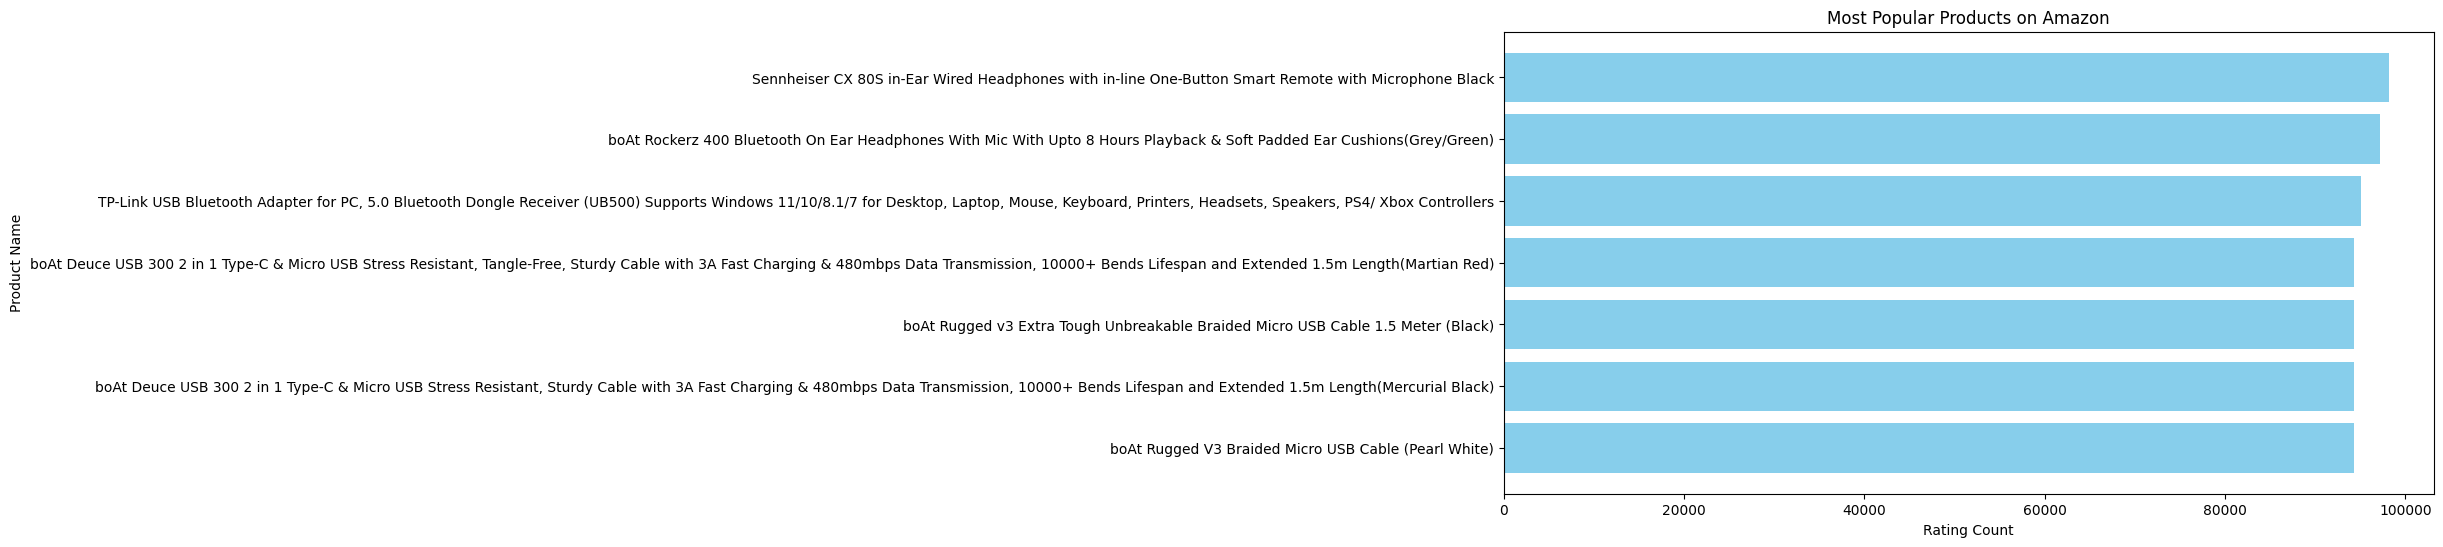

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['product_name', 'rating_count'])

# Convert rating_count to numeric format
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Sort products by rating count (descending order)
top_products = df[['product_name', 'rating_count']].sort_values(by="rating_count", ascending=False).head(10)

# Display results
print("Most Popular Products:")
print(top_products)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.barh(top_products["product_name"], top_products["rating_count"], color="skyblue")
plt.xlabel("Rating Count")
plt.ylabel("Product Name")
plt.title("Most Popular Products on Amazon")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

###**7. What are the most popular product reviews?**

Available columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
Most Popular Product Reviews:
                                           review_title  review_count
1076  Worked on iPhone 7 and didn’t work on XR,Good ...            10
881   Satisfied,Charging is really fast,Value for mo...             8
824   Phone, camera, heating - works for me, may not...             8
376   Good product,Good one,Nice,Really nice product...             7
7     A Good Braided Cable for Your Type C Device,Go...             7
27    Above average phone,Worth For The Money 💰,Okie...             6
211   Fake Product,Costly but excellent quality,Stor...             6
235   GOOD,Thank you  Amazon very good charging cabl...             5
1117  Worth the money,Good 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


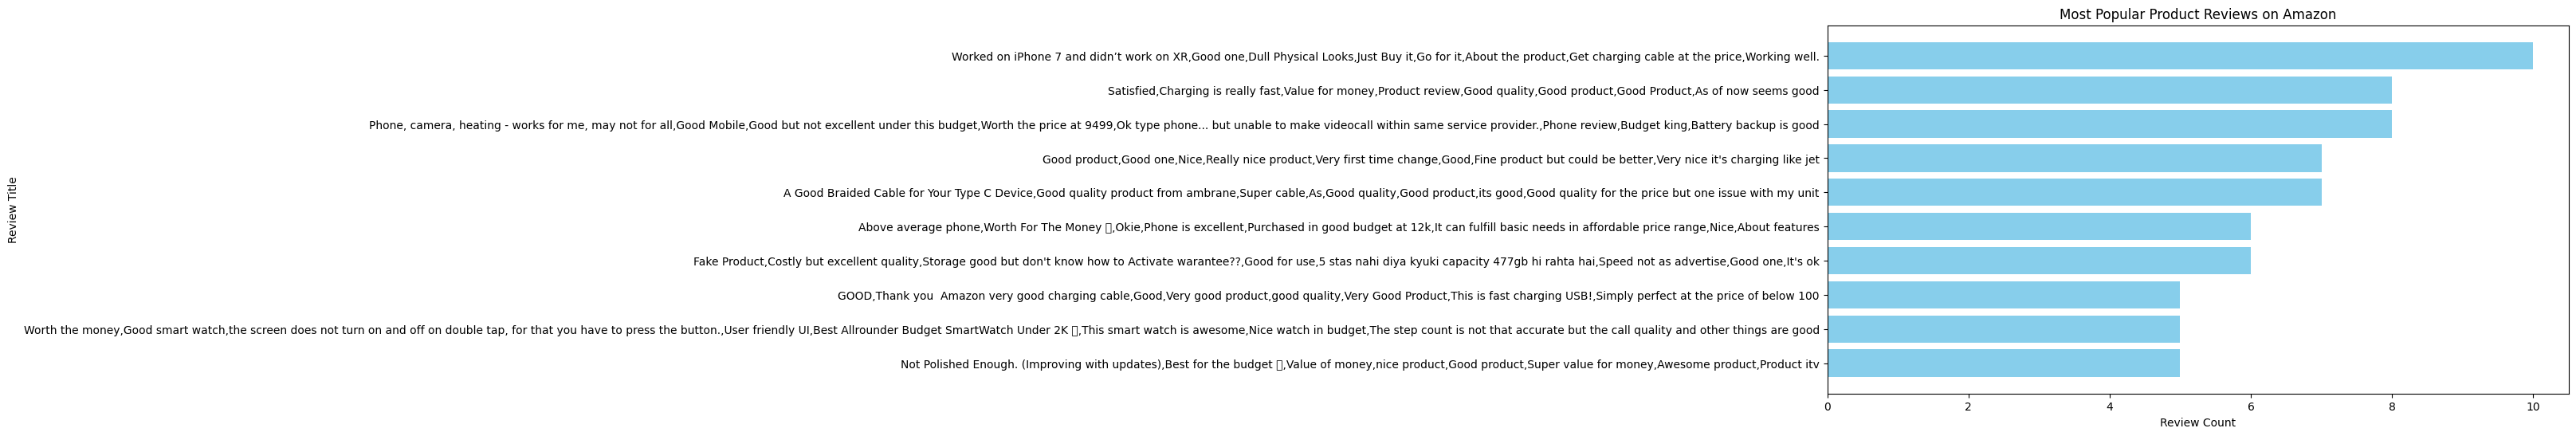

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Check available column names
print("Available columns:", df.columns)

# Standardize column names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower()

# Verify correct column names
expected_columns = ['review_id', 'review_title']
missing_columns = [col for col in expected_columns if col not in df.columns]

if missing_columns:
    print(f"Error: Missing columns {missing_columns}. Please check the dataset.")
else:
    # Drop missing values in relevant columns
    df = df.dropna(subset=['review_id', 'review_title'])

    # Count review occurrences (assuming duplicate `review_id` means higher engagement)
    popular_reviews = df.groupby('review_title').size().reset_index(name='review_count')

    # Sort reviews by count (descending order)
    popular_reviews = popular_reviews.sort_values(by="review_count", ascending=False).head(10)

    # Display results
    print("Most Popular Product Reviews:")
    print(popular_reviews)

    # Plot comparison
    plt.figure(figsize=(12, 6))
    plt.barh(popular_reviews["review_title"], popular_reviews["review_count"], color="skyblue")
    plt.xlabel("Review Count")
    plt.ylabel("Review Title")
    plt.title("Most Popular Product Reviews on Amazon")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

###**8. What is the correlation between discounted_price and rating?**

Correlation between Discounted Price and Rating:
                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


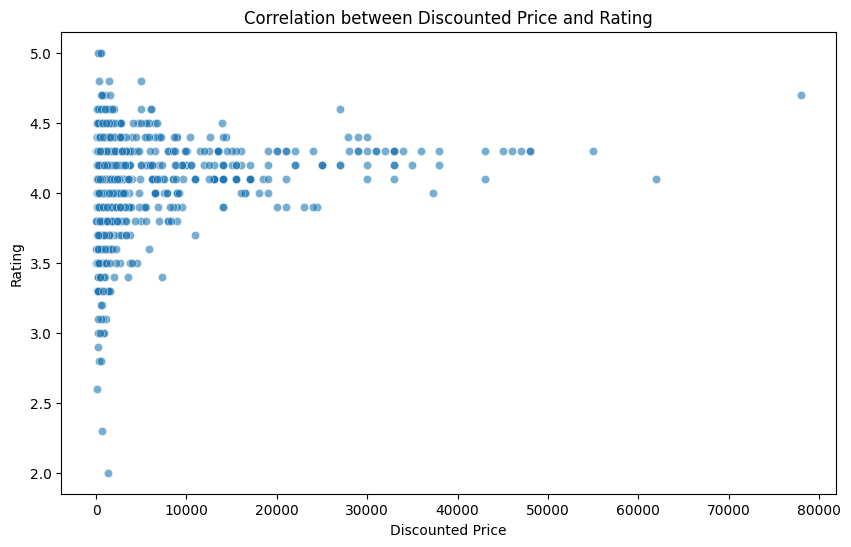

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['discounted_price', 'rating'])

# Convert columns to numeric format
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate correlation
correlation = df[['discounted_price', 'rating']].corr()
print("Correlation between Discounted Price and Rating:")
print(correlation)

# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['discounted_price'], y=df['rating'], alpha=0.6)
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.title("Correlation between Discounted Price and Rating")
plt.show()

###**9. What are the Top 5 categories based on the highest rating?**

Top 5 Categories Based on Highest Rating:
                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


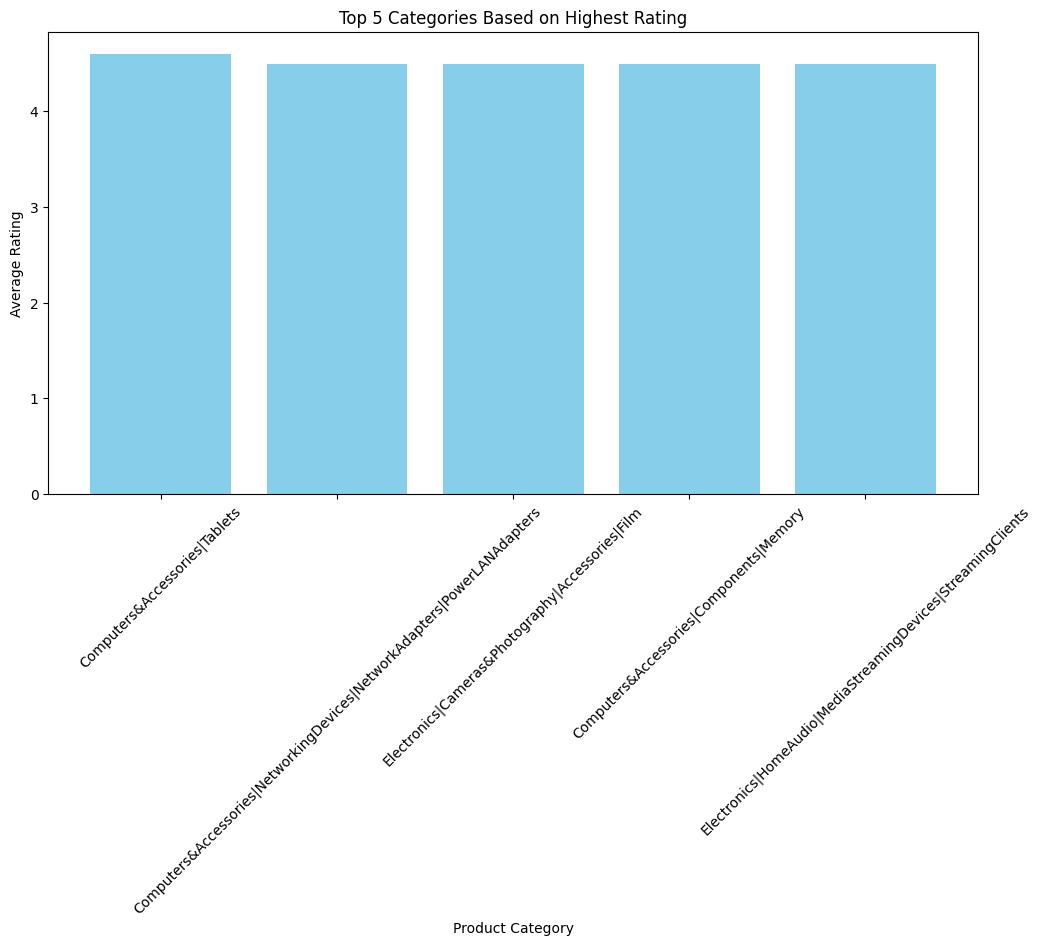

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['category', 'rating'])

# Convert rating column to numeric format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate average rating
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Sort values and extract top 5 categories
top_categories = category_avg_rating.sort_values(by="rating", ascending=False).head(5)

# Display results
print("Top 5 Categories Based on Highest Rating:")
print(top_categories)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(top_categories["category"], top_categories["rating"], color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Top 5 Categories Based on Highest Rating")
plt.xticks(rotation=45)
plt.show()

###**10.  Identify any potential areas for improvement or optimization based on the data analysis**

Top 5 Categories Based on Highest Rating:
                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


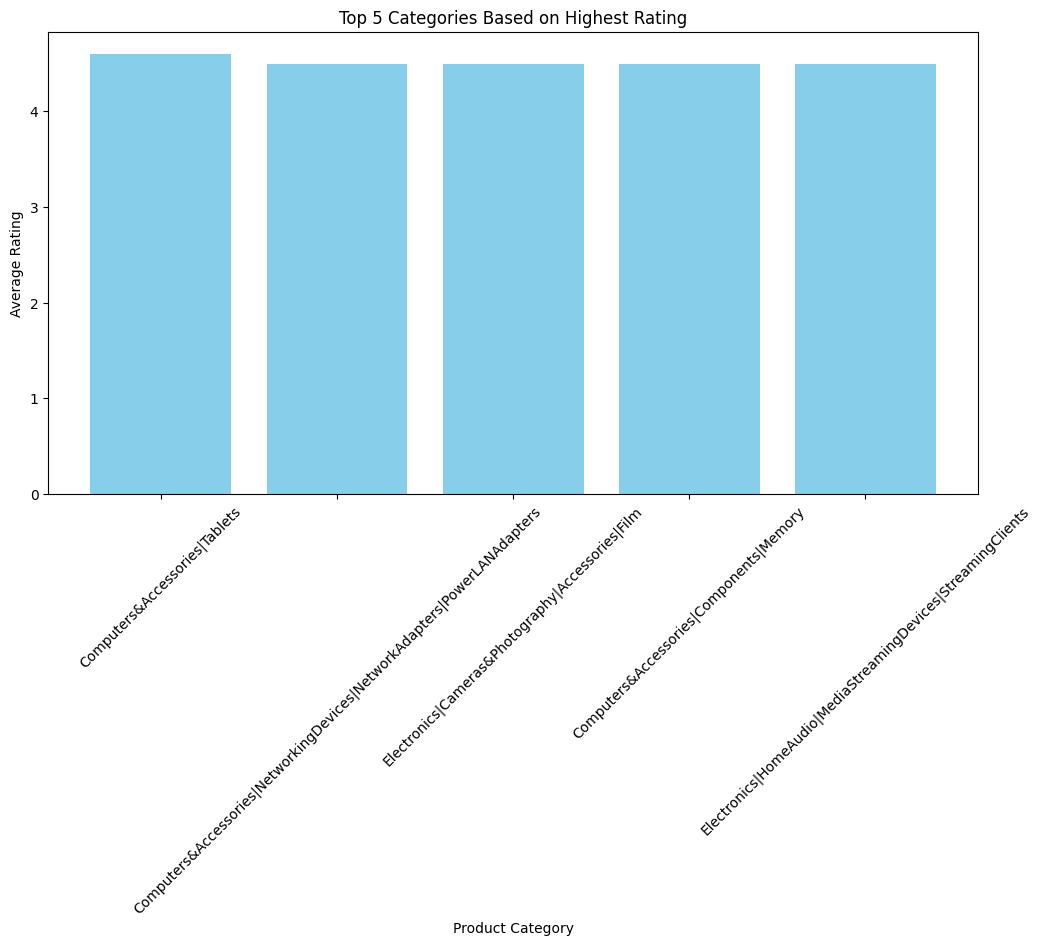

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("amazon.xlsx")  # Ensure correct file name

# Drop missing values in relevant columns
df = df.dropna(subset=['category', 'rating'])

# Convert rating column to numeric format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate average rating
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Sort values and extract top 5 categories
top_categories = category_avg_rating.sort_values(by="rating", ascending=False).head(5)

# Display results
print("Top 5 Categories Based on Highest Rating:")
print(top_categories)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(top_categories["category"], top_categories["rating"], color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Top 5 Categories Based on Highest Rating")
plt.xticks(rotation=45)
plt.show()

# **EDA-4** **Questions:** **Spotify Data: Popular Hip-Hop Artists and Tracks**


**Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [ ]:
	import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Check for null values
print("Null Values:\n", df.isnull().sum())

# Drop or fill null values (you can choose to drop or fill based on context)
df.dropna(inplace=True)  # Removes rows with any null values
# df.fillna(value="Unknown", inplace=True)  # Example alternative: Fill with "Unknown"

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify data cleanup
print("Data after cleaning:", df.info())

Null Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows:
               Artist                                         Track Name  \
39      Travis Scott                             MELTDOWN (feat. Drake)   
52      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
72         21 Savage                                            née-nah   
73             Drake                      Jimmy Cooks (feat. 21 Savage)   
76             Drake                                          Rich Flex   
131            Drake               First Person Shooter (feat. J. Cole)   
170     Metro Boomin            Trance (with Travis Scott & Young Thug)   
182   D-Block Europe                                           Overseas   
210      Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
212     Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
222          Cardi B                

**Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

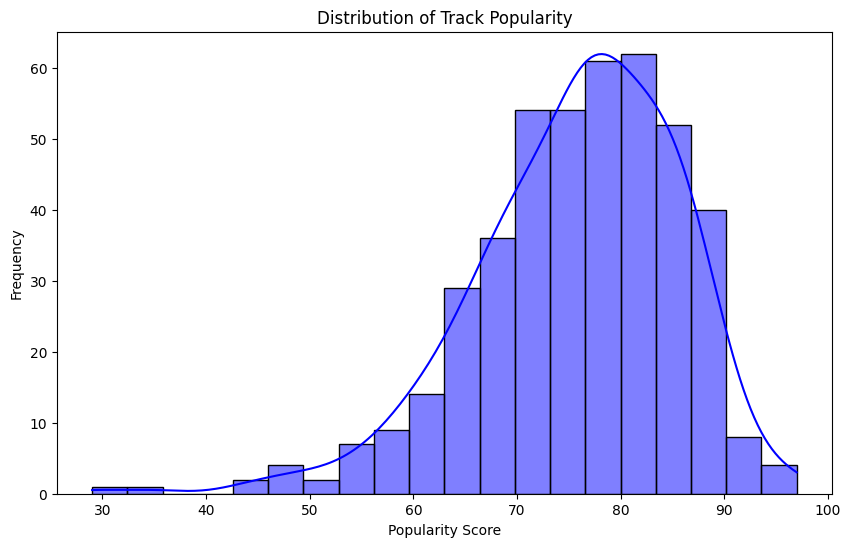

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")

# Add labels and title
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Track Popularity")

# Show plot
plt.show()

**Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

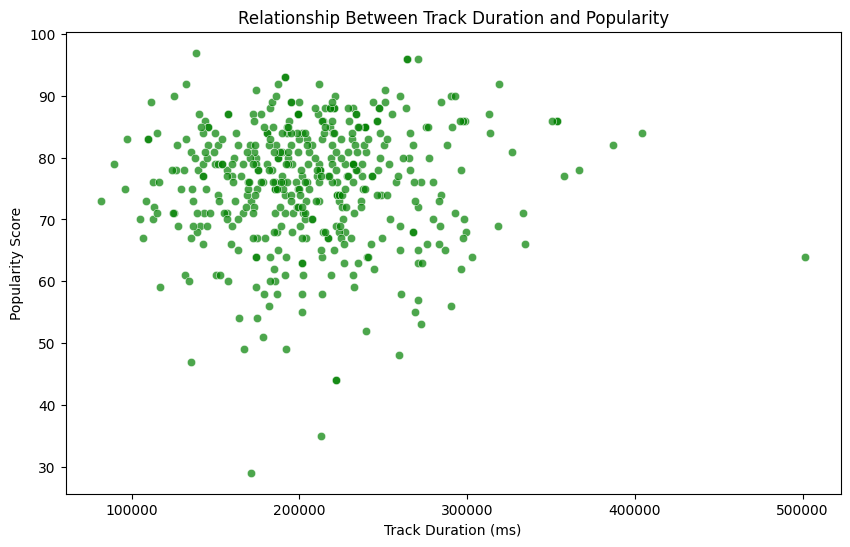

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.7, color="green")

# Add labels and title
plt.xlabel("Track Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Relationship Between Track Duration and Popularity")

# Show plot
plt.show()

 **Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.**

<ipython-input-43-4e5408a038c1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index, palette="viridis")


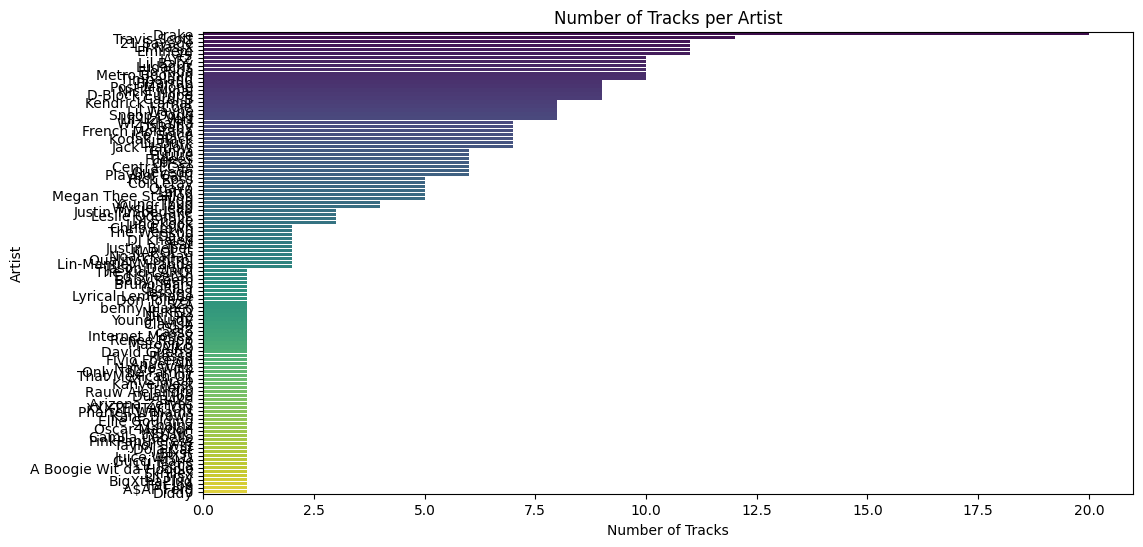

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Set figure size
plt.figure(figsize=(12, 6))

# Create countplot
sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index, palette="viridis")

# Add labels and title
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.title("Number of Tracks per Artist")

# Show plot
plt.show()

**Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Sort by popularity in ascending order
least_popular_tracks = df.sort_values(by="Popularity", ascending=True).head(5)

# Display artist name and track name
print(least_popular_tracks[["Artist", "Track Name", "Popularity"]])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


 **Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Compute the average popularity per artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()

# Sort by average popularity in descending order
artist_avg_popularity = artist_avg_popularity.sort_values(by="Popularity", ascending=False)

# Get the top 5 most popular artists
top_5_artists = artist_avg_popularity.head(5)

# Display results
print(top_5_artists)

           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


**Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Compute the average popularity per artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()

# Sort artists by their average popularity
top_5_artists = artist_avg_popularity.sort_values(by="Popularity", ascending=False).head(5)

# Find the most popular track for each of the top 5 artists
most_popular_tracks = []
for artist in top_5_artists["Artist"]:
    track = df[df["Artist"] == artist].sort_values(by="Popularity", ascending=False).iloc[0]["Track Name"]
    most_popular_tracks.append((artist, track))

# Display results
for artist, track in most_popular_tracks:
    print(f"{artist}: {track}")

cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


**Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

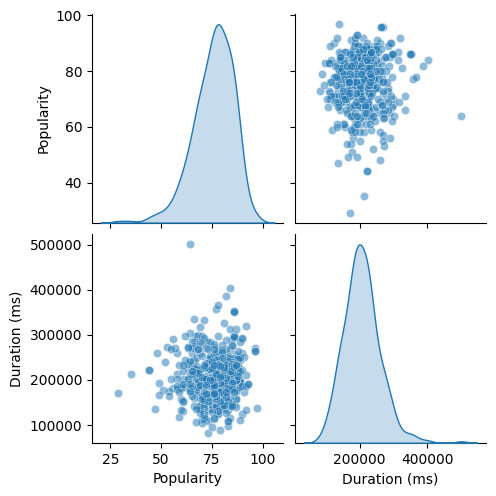

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Select numerical columns for analysis
num_cols = ["Popularity", "Duration (ms)"]

# Create Pair Plot
sns.pairplot(df[num_cols], diag_kind="kde", plot_kws={"alpha": 0.5})

# Show plot
plt.show()

**Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

<ipython-input-51-a5ef78c6fba1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Artist"], y=df["Duration (ms)"], palette="coolwarm")


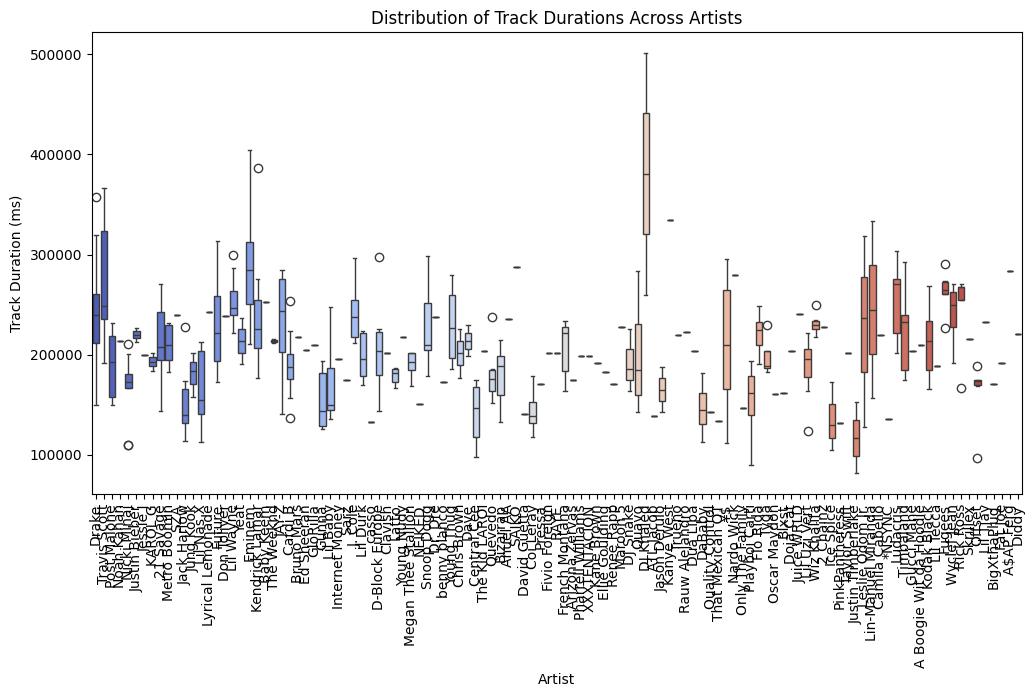

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Set figure size
plt.figure(figsize=(12, 6))

# Create Box Plot (alternative: sns.violinplot)
sns.boxplot(x=df["Artist"], y=df["Duration (ms)"], palette="coolwarm")

# Rotate labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Distribution of Track Durations Across Artists")

# Show plot
plt.show()

**Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

<ipython-input-52-e9aa65924062>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Artist"], y=df["Popularity"], palette="coolwarm")


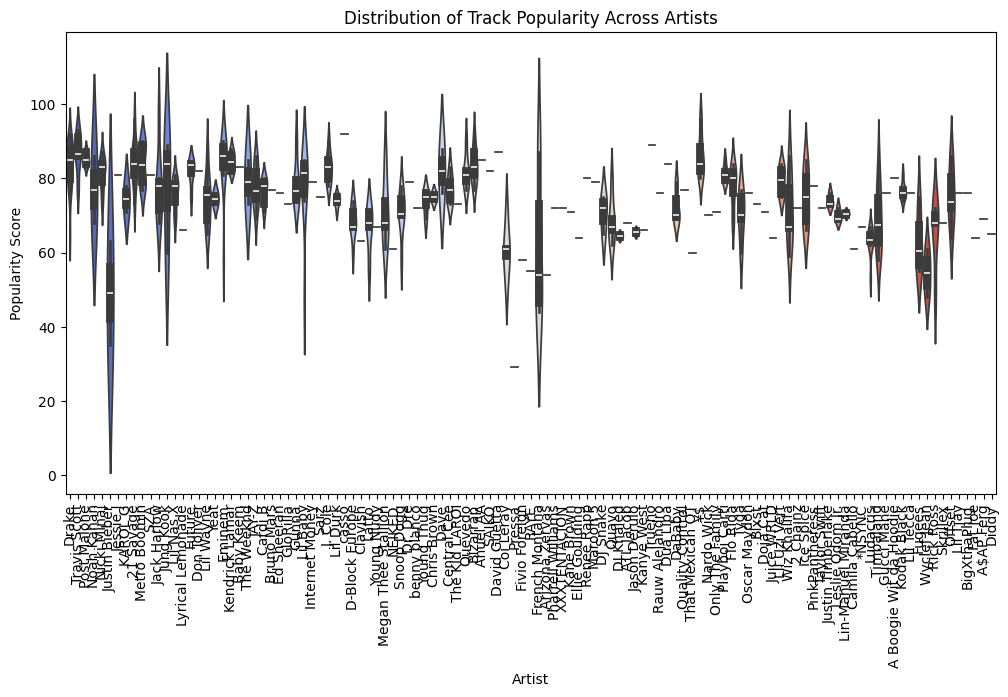

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Set figure size
plt.figure(figsize=(12, 6))

# Create violin plot
sns.violinplot(x=df["Artist"], y=df["Popularity"], palette="coolwarm")

# Alternative: Swarm plot
# sns.swarmplot(x=df["Artist"], y=df["Popularity"], color="black", alpha=0.6)

# Rotate labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Distribution of Track Popularity Across Artists")

# Show plot
plt.show()